# Medical Cost Prediction

## Introduction

This Jupyter Notebook is inspired by the **Kaggle** dataset: ***Medical Cost Personal Datasets, Insurance Forecast by using Linear Regression***. The objective of this study is to try to accurately predict the insurance cost of individuals based on their (Age, Sex, Body mass index, Number of children covered by health insurance, Smoking habits, Residential area)


We will organize our work in sections as follow :

- Data: Where we will retrieve the data and define the variables.
- Exploratory Data Analysis: Where we will analyze the features, their relationship with the target variable, and their respective inter-features correlations
- Predictions: Where we will test the different regression models, select for each the most important features, and tune its parameters.
- Results: Where we will discuss the results.
- Conclusion: Where we will summarize our work and state any possible improvements.

To keep our notebook as readable and light as possible, we will call the used libraries and define the user-made functions in the separate file $Myfunctions.py$ and import it into the libraries section below.


### Libraries

In [1]:
from Myfunctions import *

## Data

This dataset can be found in the ***Kaggle*** dataset **Medical Cost Personal Datasets** [[0]](#ref0), under the <a name='ref0' href='https://opendatacommons.org/licenses/dbcl/1-0/'> Open Data Commons License </a>. It was orginally featrured in the *Machine Learning with R by Brett Lantz* book.<br>

The dataset as described in the ***Kaggle*** page contains seven columns : 

- **Age**: Age of primary beneficiary. <br>

- **Sex**: Insurance contractor gender, female, male. <br>

- **Bmi**: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, objective index of body weight (kg / $m ^ 2$) using the ratio of height to weight, ideally 18.5 to 24.9. <br>

- **Children**: Number of children covered by health insurance / Number of dependents. <br>

- **Smoker**: Smoking. <br>

- **Region**: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>

- **Charges**: Individual medical costs billed by health insurance. <br>

We will start by reading the CSV file and visualizing the first five rows of our dataset.

In [2]:
#Import CSV file
data = pd.read_csv('./Data/insurance.csv')
print('The Medical Cost dataset shape : ',data.shape)
data.head()

The Medical Cost dataset shape :  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Our dataset contains 1338 rows. A good train test split might be 1000 rows for training and 338 rows for the test. We can approximately achieve this split using 0.25 of the dataset for testing.<br>
The dataset counts six features, two of which are boolean: **sex** and **smoker**. One categorical **region** and three numerical variables with two discrete **age** and **children**, and a continuous one **BMI**. It means that we will need to apply some categorical encoding in the preprocessing step.<br>
The last column of our dataset is our target variable **charges**, a continuous numerical variable.<br>
Before jumping into the **EDA** step let's check if our dataset contains any missing data.

In [3]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

No variable contains a null value which means less work in the data preprocessing step.

## Exploratory Data Analysis

In this section, we will explore each of our features separately, then their respective impacts on the target variable, and finally their mutual correlations. <br>

### Univariate Analysis

In this step, we will start by computing and visualizing the statistical measurements of our features, using the **pandas describe()** method. Then we will plot the required graphs to visualize their distributions.

#### Statistic Table

In [4]:
display(data.iloc[:,:-1].describe(include = 'all'))
print('The skewness of our numerical features: ')
print(data.iloc[:,:-1].skew())
print('The mode of our numerical features: ')
print(data.iloc[:,:-1].mode())

,age,sex,bmi,children,smoker,region
count,1338.000000,1338,1338.000000,1338.000000,1338,1338
unique,NaN,2,NaN,NaN,2,4
top,NaN,male,NaN,NaN,no,southeast
freq,NaN,676,NaN,NaN,1064,364
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN
std,14.049960,NaN,6.098187,1.205493,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN


The skewness of our numerical features: 
age         0.055673
bmi         0.284047
children    0.938380
dtype: float64
The mode of our numerical features: 
   age   sex   bmi  children smoker     region
0   18  male  32.3         0     no  southeast


##### Numerical Features:
- **Age**: The age of the primary beneficiary ranges from 18 years old to 64. We can notice that the mean with a value of 39.21 and the median with a value of 39 are approximately equal, which ***generally*** indicates a symmetric distribution of data. The skewness value 0.055673 is approximately null, going hand to hand with our assumption concerning the symmetry of our data distribution. On the other hand, The mode value is 18 years old, a much lower value than the mean and median, which refutes our initial assumption that our observed group age is distributed equally around the mean. We can also observe that the standard deviation is 14.05 years which is a high value for our variable, it means that the age of our population is not concentrated around the mean (39.21 years old) but spread out from it. This variability may imply that the age feature is ***potentially*** a good predictive, but its impact on the target variable needs to be assessed properly. <br>
- **BMI**: The Body Mass Index ranges from 15.96 to 53.13, the two limits of this range are outside the *ideal range* (which is from 18.5 to 24.9). We can see that here also the mean and median are approximately equal (about 30.5), and the skewness is roughly null these two elements indicate a symmetric distribution. And if we notice the mode value is 32.3 which is very close to the mean, this confirms that the BMI is equally distributed around the mean, and since BMI is a continuous variable it indicates a **normal distribution**. We can see if there is any impact on the medical charges in the following steps.<br>
- **Children**: The number of children covered by the insurance is a maximum of 5 and a minimum of 0, this latter is also equal to the first quartile, implying that at least 25% of our population doesn't have children. The mean and median are roughly equal but the skewness is approximately 1 indicating a positive skewness. <br>

##### Boolean Features:
- **Sex**: The most frequent gender in our dataset is *male* with 676 observation. <br>
- **Smoker**: The most frequent value is non-smokers with 1064 observation. <br>

##### Categorical Features:
- **Region**: The region variable counts 4 unique values, the most frequent one is *southeast* with 364 observation. <br>

#### Statistic graphic visualisations
##### Numerical Features:

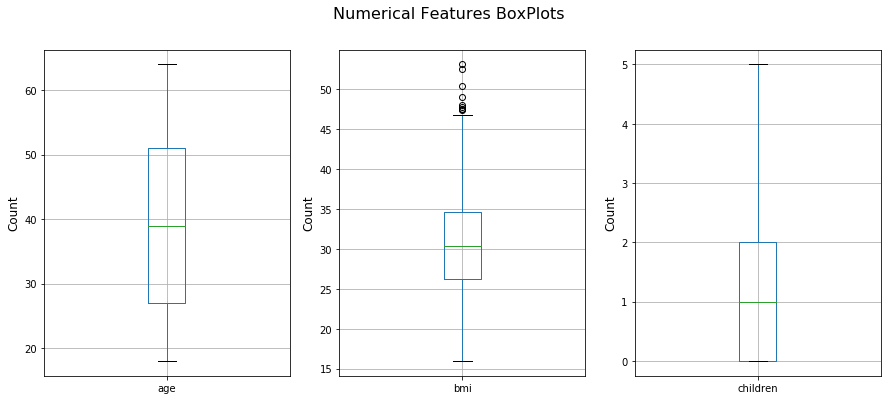

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),squeeze=False)

for i,column in enumerate(['age','bmi','children']): 
    data.boxplot(column=[column],ax=axes[0][i])
    axes[0][i].set_ylabel('Count', size=12)
fig.suptitle('Numerical Features BoxPlots', fontsize=16)
plt.show()

- **Age**: The boxplot graph confirms the results of the statistical table. We find the median at approximately 39 years old. We can see that the middle half of our dataset is aged between 27 and 51 years old, and no outliers are marked.  <br>
- **BMI**: The boxplot shows some outliers in the upper-end. Considering they are only a few outliers and they don't seem to be due to error since the values (max = 53.13) are close to the upper extremity of the box ($Q_3+1.5*IQR=47.29$), we will keep the outliers in the preprocessing step. In the upcoming steps, if we notice an unnecessary association, we may decide otherwise. We can also notice the symmetry of the box around the middle line. <br>
- **Children**: The graph shows what we expected a quarter of our population doesn't have any children covered by health insurance. We can also notice the asymmetry of our boxplot with the upper fence at five children, and 75% of the population has two or fewer children. Although the difference between the median and mean is small, this asymmetry leads us to expect a skewness in the distribution. <br>

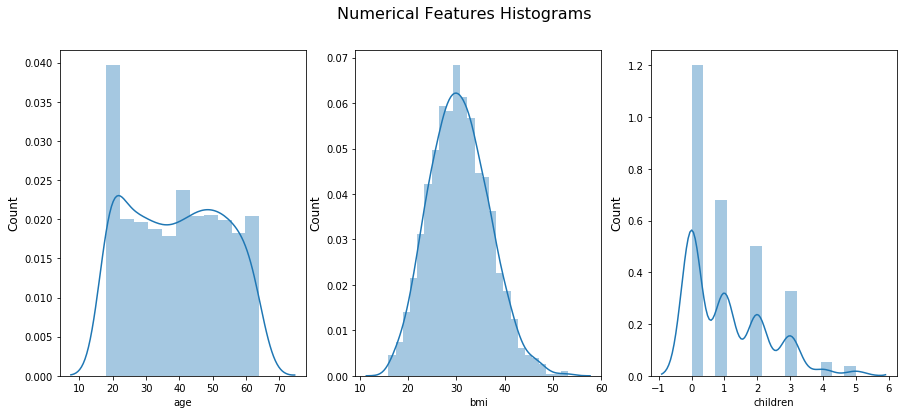

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),squeeze=False)

for i,column in enumerate(['age','bmi','children']): 
    sns.distplot(data[column],ax=axes[0][i])
    axes[0][i].set_ylabel('Count', size=12)
fig.suptitle('Numerical Features Histograms', fontsize=16)
plt.show()

The Histograms confirms some of the expectation drawn from the boxplots and explain some observations.
- First, we can see that the **BMI** follows a normal distribution. A distribution we expected from the statistical table where the mean, median and mode are approximately equal (in a continuous variable) and the symmetry of the boxplot.
- Second observation is the skewness of the **children** graph, which we expected from the boxplot asymmetry. As seen in the table and the previous graph, we can see in this chart also that 25% of the population have no children covered by insurance. It can be due to the **age** distribution. 
- In the **age** Histogram, all ages greater or equal to 21 have the mass function ranges from 0.018 to 0.024, and for ages 20 and less equals 0.04 which is approximately double. So the Largest age group is less than 20, and we can't expect this group to have children, this may explain that 25% of our population don't have children.<br>

#### Boolean and categorical Features:

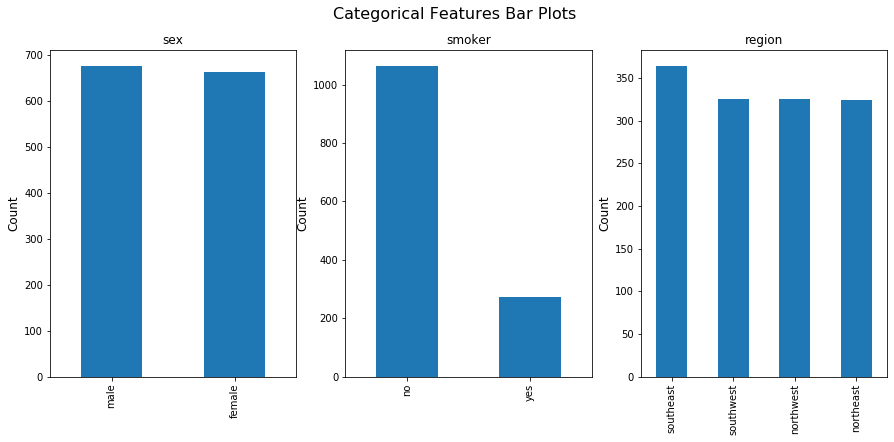

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),squeeze=False)

for i,column in enumerate(['sex','smoker','region']): 
    data[column].value_counts().plot(kind='bar',title=column,ax=axes[0][i])
    axes[0][i].set_ylabel('Count', size=12)
fig.suptitle('Categorical Features Bar Plots', fontsize=16)
plt.show()

The boolean features, **Sex** and **Smoker**, bar plots don't show any new information compared to the statistical table. The mode of the **Sex** feature is *Male* with a value count slightly higher than half of our population. The *Non-Smokers* are the most common value representing 80% of the population.<br>
The **Region** bar plot confirms that the *southeast* is the mode of our population, and shows that the three other values : *southwest*, *northwest* and *northeast* share the same frequency at approximately 325.<br>

### Bivariate Analysis

In this step, we will explore the correlation between our features and our target variable.

#### Numerical Features:

To investigate the correlation between our target variable: '**Chargers**' and our numerical features (**Age**, **BMI**, and **Children**), we will start by visualizing the scatter plot then compute the **Correlation Coefficient**.

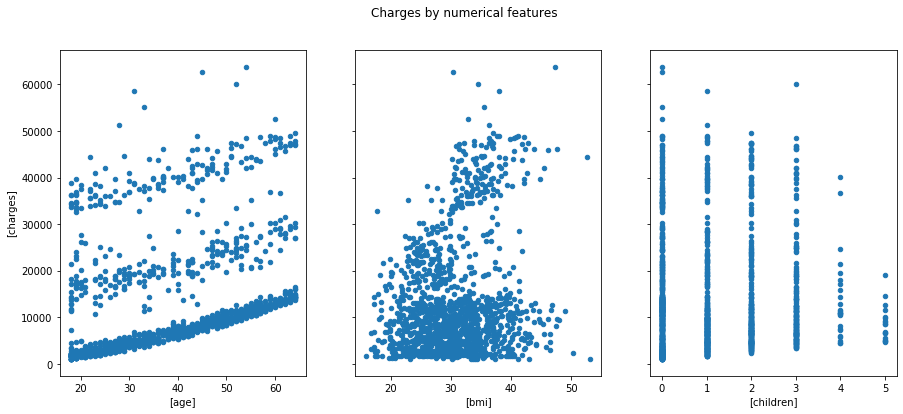

In [8]:
fig, axes = plt.subplots(1,3,figsize=(15, 6) ,sharey=True)

for i, col in enumerate(['age','bmi','children']):
    data.plot(x=[col], y=['charges'], kind="scatter", ax=axes[i])

fig.suptitle('Charges by numerical features')
plt.show()

In [9]:
print('The Pearson coefficient of correlation: ')
print(data.corr(method='pearson')['charges'])
print('The Spearman coefficient of correlation: ')
print(data.corr(method='spearman')['charges'])

The Pearson coefficient of correlation: 
age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64
The Spearman coefficient of correlation: 
age         0.534392
bmi         0.119396
children    0.133339
charges     1.000000
Name: charges, dtype: float64


Across the three variables, we can't see a clear linear relationship with our target variable, neither with scatter plot or the **Pearson's Coefficient**.<br>
- The **Age** graph shows three parallel groups of data each appears linearly correlated to our target variable. Generally, we can see that younger people pay less, and we expect that other factors such as chronic illnesses can explain the different groups. The graph may indicate that the feature age has good predictive potential even with a low **Pearson's** coefficient value of 0,299. The Person's coefficient measures the linear correlation between two variables hence its low value. The **Spearman's** coefficient, which measures the correlation between the rank values of two variables, is slightly higher than the **Pearson's** value, 0,534, confirming our supposition that there is a relationship between the age of the individual and its medical insurance charges.<br>
- The **BMI** scatter plot seems random combined with the **Pearson's** coefficient value of 0,198 and the **Spearman's** 0,119
 we can deduce a low correlation between the feature and the Medical charges. We can try to divide the BMI into bins and verify any improvement in the correlation. <br>
- The **Number of Children** graph doesn't show a trend. As found in the univariate analysis section, we can see in the scatter plot fewer people with 4 and 5 children, however, we can't see a relation between the charges that the person pays and the number of his children. The Pearson's coefficient with a value of 0,068 and the Spearman's 0,133 also, confirm the absence of linear correlation between the two variables.<br>

The resulting coefficients and the graphs imply a low correlation between our features and the medical charges. The solution may be :
- Discard the variables with the lowest correlation coefficient, which can be a not-so-wise approach since we only have seven features.
- Use Feature engineering.
- Opt for a non-linear regression model.


#### Boolean Features:
To evaluate the correlation between our boolean features (**Sex** and **Smoker**) and the target variable (**Charges**), we will start by comparing the charges histograms of **Males** and **Females**, and the histograms of **Smokers** and **Non-Smokers**. Then we will use the **Point biserial correlation coefficient**, which is suited for correlation measurement between a continuous and boolean variable.
To compute the said coefficient, we will need to encode our data:
- **Sex**: 'female' as '0', and 'male' as '1'. 
- **Smoker**: 'no' as '0', and 'yes' as '1'.

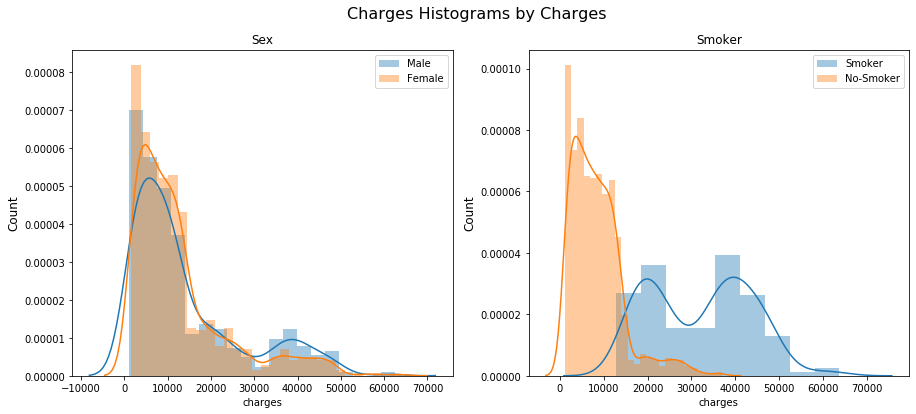

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


The Point Biserial correlation coefficient between Sex and Charges is: 0.057292062202025366
The Point Biserial correlation coefficient between Smoker and Charges is: 0.7872514304984775


In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6),squeeze=False)


sns.distplot(data[data['sex']=='male']['charges'],label='Male',ax=axes[0][0])
sns.distplot(data[data['sex']=='female']['charges'],label='Female',ax=axes[0][0])
axes[0][0].set_ylabel('Count', size=12)
axes[0][0].set_title('Sex', size=12)
axes[0][0].legend()

sns.distplot(data[data['smoker']=='yes']['charges'],label='Smoker',ax=axes[0][1])
sns.distplot(data[data['smoker']=='no']['charges'],label='No-Smoker',ax=axes[0][1])
axes[0][1].set_ylabel('Count', size=12)
axes[0][1].set_title('Smoker', size=12)
axes[0][1].legend()

fig.suptitle('Charges Histograms by Charges', fontsize=16)
plt.show()

data['sex'] = data['sex'].replace(['female','male'],[0,1])
data['smoker'] = data['smoker'].replace(['no','yes'],[0,1])
display(data.head())
print('The Point Biserial correlation coefficient between Sex and Charges is: {}'.format(pointbiserialr(data['sex'],data['charges'])[0]))
print('The Point Biserial correlation coefficient between Smoker and Charges is: {}'.format(pointbiserialr(data['smoker'],data['charges'])[0]))

Here as well the coefficient values and the graphs confirm each other. 
- We can see that **Charges** frequency distribution is similar for **Males** and **Females**, which implies that the **Sex** feature has a low impact on the target variable. If we take a look into the **Point Biserial Coefficient** value of 0,0573, we can confirm the low correlation between the gender of the individual and the Health insurance charges.
- The **Smoker** feature scored the highest correlation coefficient up until now 0,787. We can see that the histogram shows a clear distinction between the **Smokers** and **Non-Smokers**: With the first paying much more medical charges, which makes sense.

#### Categorical Feature 
The last feature is **region**, which is a categorical variable with four different categories. To evaluate its correlation to the target variable, we will use **Hypothesis Testing**. But first, we will plot the frequency distribution of the charges and its boxplot for each region.

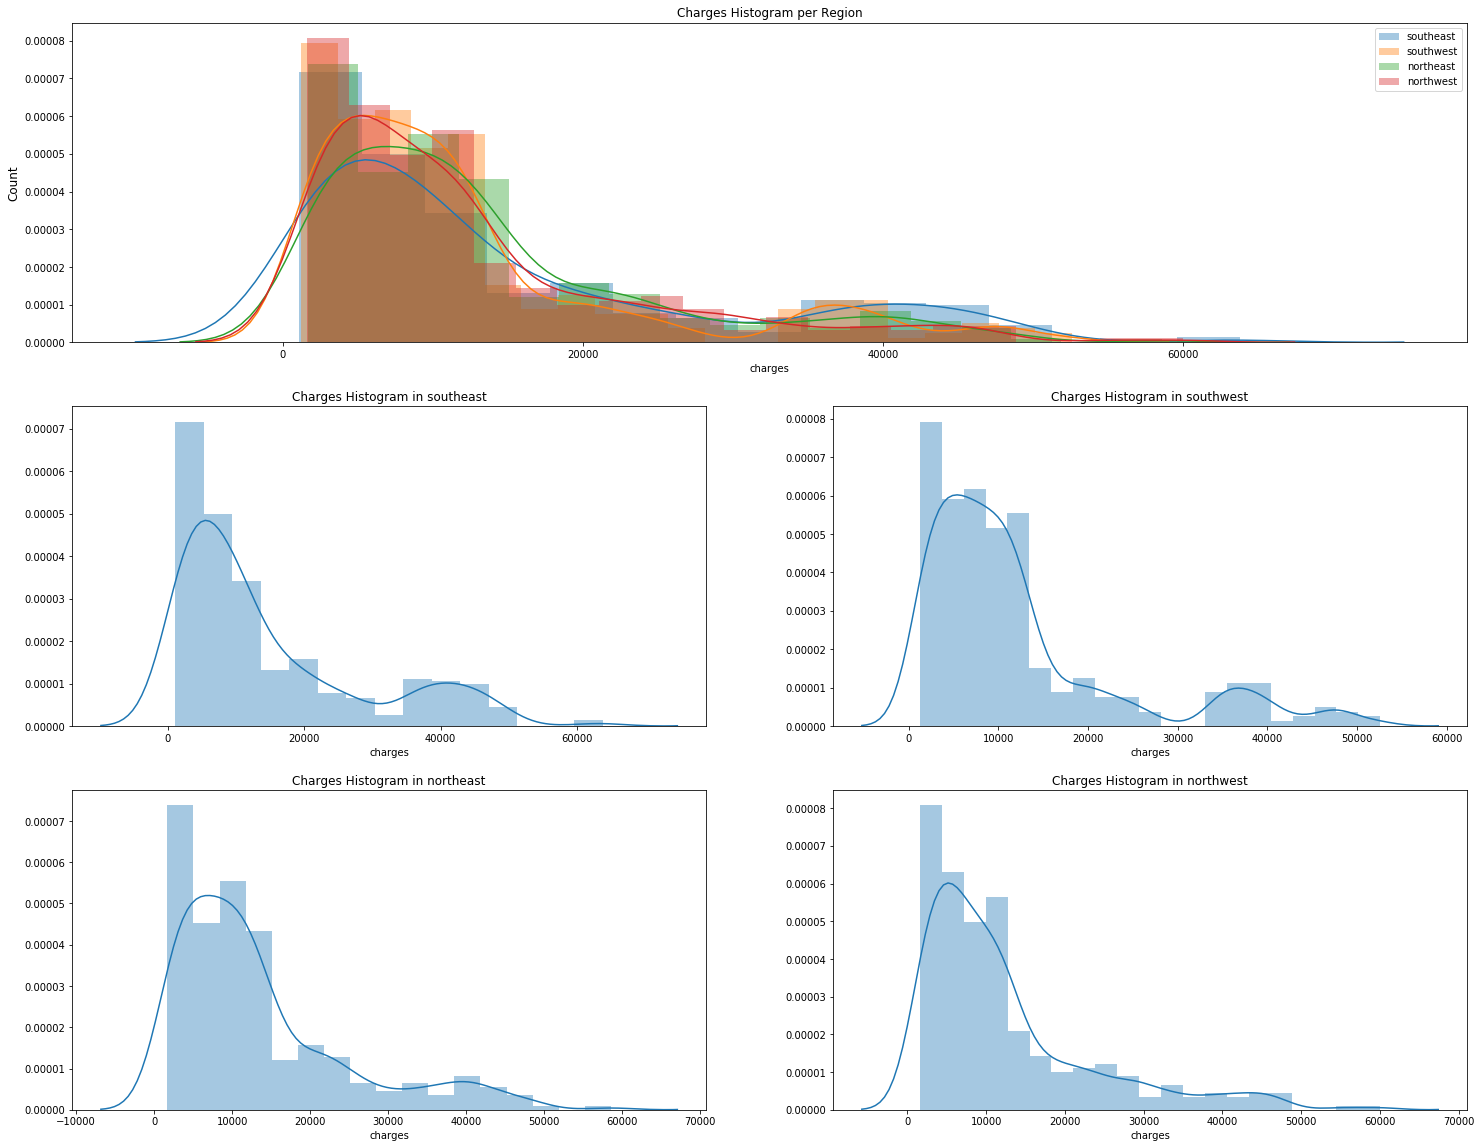

In [11]:
fig = plt.figure(figsize=(25, 20),constrained_layout=False)

gs = fig.add_gridspec(nrows=3, ncols=2)

ax=[]
for i in [1,2]:
        ax.append([fig.add_subplot(gs[i, 0]),fig.add_subplot(gs[i, 1])])

ax3 = fig.add_subplot(gs[0, :])

sns.distplot(data[data.region=='southeast'].charges,label='southeast',ax=ax[0][0])
ax[0][0].set_title('Charges Histogram in southeast', size=12)
sns.distplot(data[data.region=='southwest'].charges,label='southwest',ax=ax[0][1])
ax[0][1].set_title('Charges Histogram in southwest', size=12)
sns.distplot(data[data.region=='northeast'].charges,label='northeast',ax=ax[1][0])
ax[1][0].set_title('Charges Histogram in northeast', size=12)
sns.distplot(data[data.region=='northwest'].charges,label='northwest',ax=ax[1][1])
ax[1][1].set_title('Charges Histogram in northwest', size=12)

sns.distplot(data[data.region=='southeast'].charges,label='southeast',ax=ax3)
sns.distplot(data[data.region=='southwest'].charges,label='southwest',ax=ax3)
sns.distplot(data[data.region=='northeast'].charges,label='northeast',ax=ax3)
sns.distplot(data[data.region=='northwest'].charges,label='northwest',ax=ax3)

ax3.set_ylabel('Count', size=12)
ax3.set_title('Charges Histogram per Region', size=12)
ax3.legend()

plt.show()

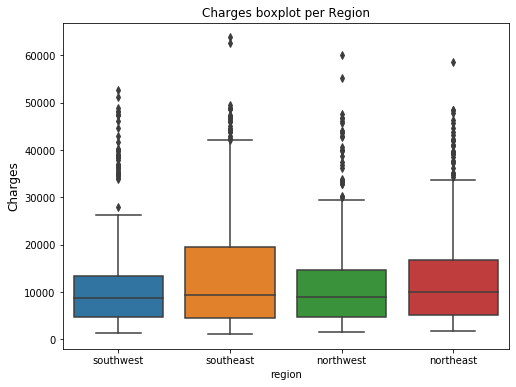

In [12]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x ='region',y='charges',data=data)
plt.ylabel('Charges', size=12)
plt.title('Charges boxplot per Region', size=12)
plt.show()

- The superimposed histograms show similar distributions. When we zoom in on each of the four regions, we can see four positively skewed distributions with no noticeable differences.<br>
- The boxplots show a similar central tendency between the groups. The four regions have approximately a median of 9000, with the Northeast seemingly having a slightly higher value. It means that at least 25% of each group pays 9000 or less medical charges. <br>
- The IQR regions, on the other hand, show that the groups have different variabilities. We can see, for example, that 25% of all the regions pay approximately 5000 or less. But 75% of the **Southwest** region pay roughly 13000 against an approximate 20000 for the **Southeast**. <br>

We will evaluate the statistical significance of the difference between the samples medians and variances using the Kruskal–Wallis one-Way and Levene tests. <br>

To assess if there is a significant difference between the medical charges medians in the four regions, we will use the **Kruskal–Wallis H test**. It is a non Parametric version of the **One-Way Anova Test**. I opted to use the **Kruskal–Wallis H test** because the distribution of our dependent variable is skewed, which doesn't conform to the ANOVA's Normality assumption.

To perform the said test, we start by choosing our significance level: $\alpha=0.05$, then we formulate our hypothesis as follow :<br>
- $H_0$: There are no differences among the four groups **charges** medians.
- $H_1$: At least one group differs significantly from the overall medians of the **charges**.


In [13]:
statistics, p_value = kruskal(data[data.region=='southeast'].charges,
                              data[data.region=='southwest'].charges,
                              data[data.region=='northwest'].charges,
                              data[data.region=='northeast'].charges)

print('The Kruskal–Wallis H statistic={} and the p-value={}'.format(statistics, p_value))

The Kruskal–Wallis H statistic=4.734181215658743 and the p-value=0.19232908072121002


The obtained p-value is 0.192, which is greater than our significance level $\alpha$, so we can't reject the null hypothesis $H_0$. There is no significant difference between the medians of the four groups.<br>

The **Levene test** will allow us to evaluate whether the four groups have different variances or not. Since our distributions are skewed we will be using the median as the center. We start by choosing the significance level: $\alpha=0.05$. Our test hypotheses formulated as: <br>
- $H_0$: There are no differences among the four groups **charges** variances.
- $H_1$: At least one group differs significantly from the overall variances of the **charges**.

In [14]:
statistics, p_value = levene(data[data.region=='southeast'].charges,
                             data[data.region=='southwest'].charges,
                             data[data.region=='northwest'].charges,
                             data[data.region=='northeast'].charges,
                             center='median')

print('The Levene test statistic={} and the p-value={}'.format(statistics, p_value))

The Levene test statistic=5.559966758410606 and the p-value=0.0008610590250786703


The obtained p-value is 0.00086, which is way less than our significance level $\alpha$, so we can reject the null hypothesis $H_0$. At least one of the four groups has a significantly different variance. As a side note, this result also confirms the use of the **Kruskal–Wallis Test** since the **One-Way Anova** assumes a similar variance in the independent variable groups.<br>

The results of the two tests imply that the region feature doesn't affect the central tendency of the target variable, but it does affect its variability. I think introducing four new dummy variables can be interesting (North, South, East, West).

To evaluate the impact of dividing the region variable into cardinal directions, and since these groups are dependent, we will investigate the (South, North) partition then the (East, West) partition. This partitioning will create two new boolean variables ***North*** and ***East***, allowing us to use the **Point Biserial correlation coefficient**.

In [15]:
data['North'] = data['region'].replace(['northwest','northeast','southeast','southwest'],[1,1,0,0])
data['East'] = data['region'].replace(['northeast','southeast','northwest','southwest'],[1,1,0,0])
display(data.head())
print('The Point Biserial correlation coefficient between North and Charges is: {}'.format(pointbiserialr(data['North'],data['charges'])[0]))
print('The Point Biserial correlation coefficient between East and Charges is: {}'.format(pointbiserialr(data['East'],data['charges'])[0]))

,age,sex,bmi,children,smoker,region,charges,North,East
0,19,0,27.900,0,1,southwest,16884.92400,0,0
1,18,1,33.770,1,0,southeast,1725.55230,0,1
2,28,1,33.000,3,0,southeast,4449.46200,0,1
3,33,1,22.705,0,0,northwest,21984.47061,1,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0


The Point Biserial correlation coefficient between North and Charges is: -0.028798631245562544
The Point Biserial correlation coefficient between East and Charges is: 0.07131392763745258


The **Point Biserial Correlation Coefficient** for the two variables are close to null, which means that our Cardinal regions and our Target variable are not correlated. Since we only have seven features, we will keep the region feature. And while training our regression models, we will try the two methods:
- Transforming the region feature into four dummy variables (Northwest, Northeast, Southeast, Southwest).
- Keeping only two boolean variables (North, East).

### Multivariate Analysis

In this step, we will evaluate the correlations between the features.

#### Numeric Features:
To investigate the relationship between the numeric features, we will use the same method as we did in the **Bivariate Analysis**. We will use the scatter plots and the **Person's Coefficient**.

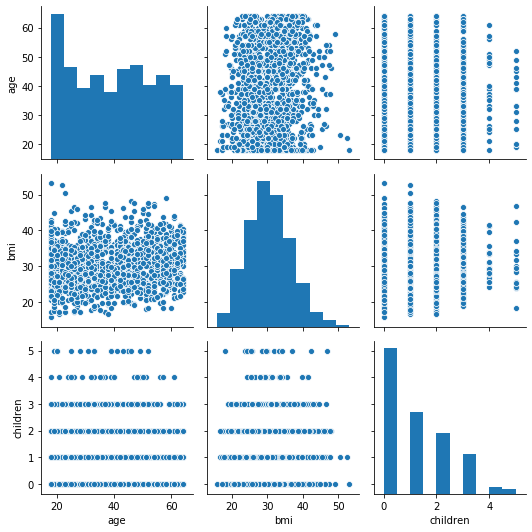

In [16]:
sns.pairplot(data[['age','bmi','children']],
            kind='scatter')
plt.tight_layout()
plt.show()

In [17]:
print('The Pearson coefficient of correlation:')

display(data[['age','bmi','children']].corr())

print('The Spearman coefficient of correlation:')

display(data[['age','bmi','children']].corr(method='spearman'))

The Pearson coefficient of correlation:


,age,bmi,children
age,1.000000,0.109272,0.042469
bmi,0.109272,1.000000,0.012759
children,0.042469,0.012759,1.000000


The Spearman coefficient of correlation:


,age,bmi,children
age,1.000000,0.107736,0.056992
bmi,0.107736,1.000000,0.015607
children,0.056992,0.015607,1.000000


The scatter plots and the coefficients results show no correlation between the features: **Age**, **BMI**, and **Children**. In the Univariate section, we have expected the number of children to correlate with the age, but the result show otherwise. <br>
This results pushed me to evaluate the relation between the age and the children considering this latter as a categorical variable. We will first visualize the distribution of the age variable for each number of children. Then we will evaluate the correlation using the **Kruskall-Wallis Test** since the age variable is not normally distributed. As before we will choose as significance level $\alpha = 0.05$. And our hypothesis will be : 
- $H_0$: There are no differences among the groups **ages** medians.
- $H_1$: At least one group differs significantly from the overall medians of the **ages**.

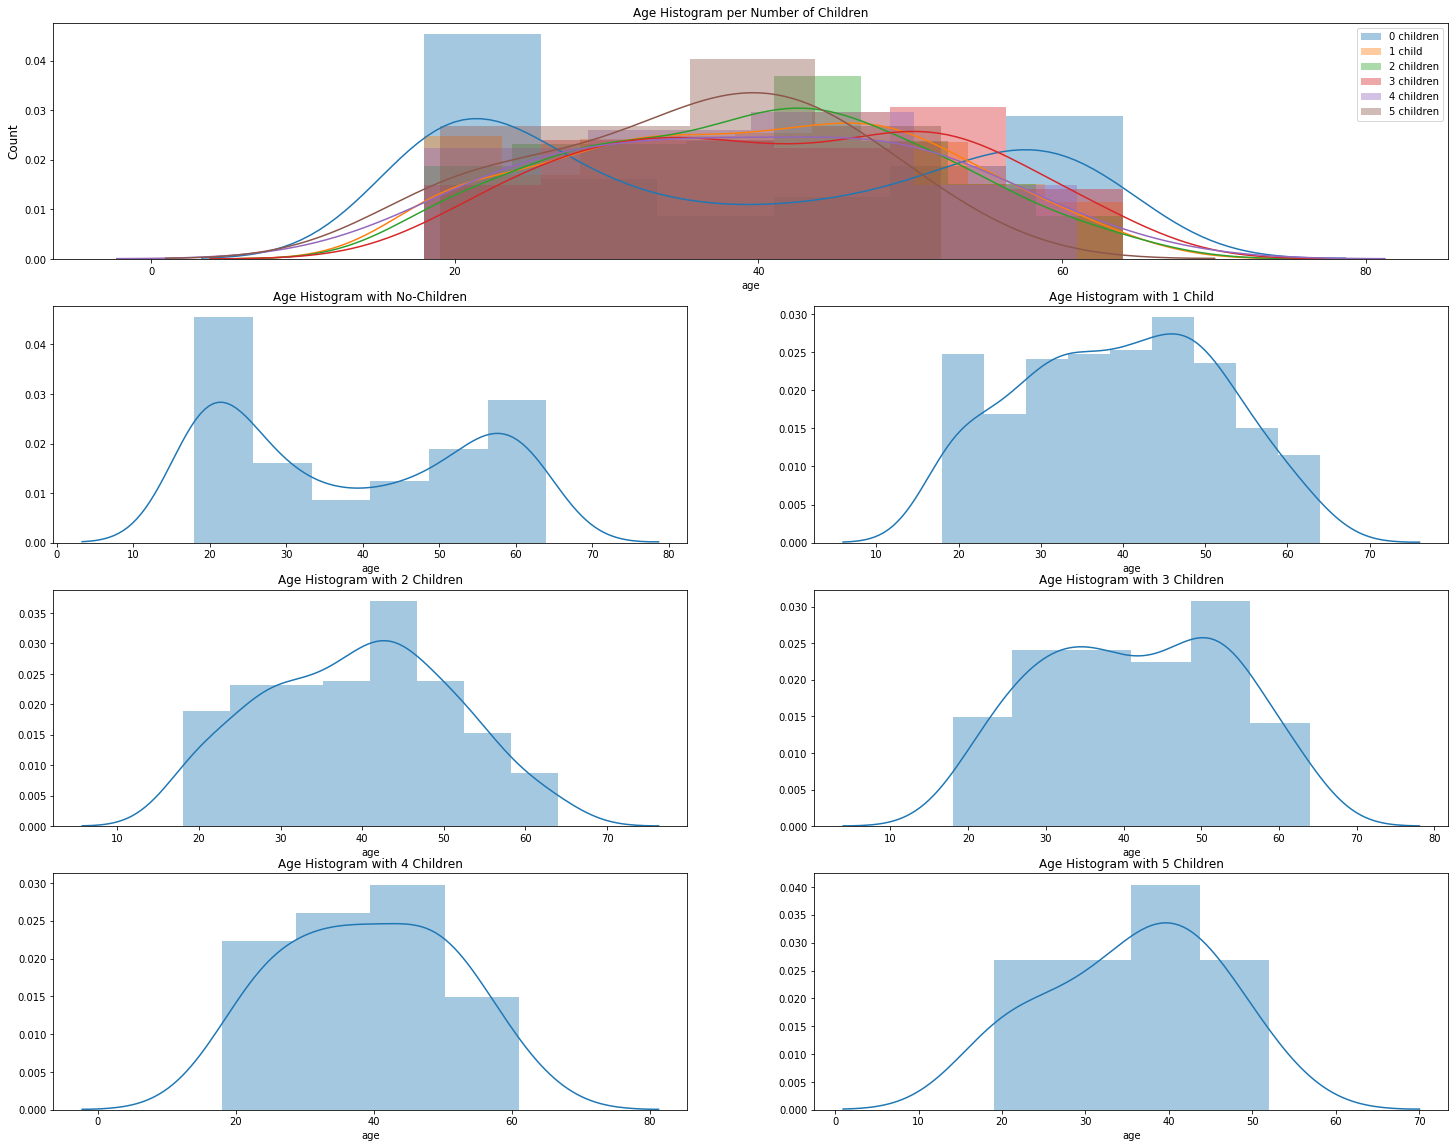

In [18]:
fig = plt.figure(figsize=(25, 20),constrained_layout=False)

gs = fig.add_gridspec(nrows=4, ncols=2)

ax=[]
for i in [1,2,3]:
        ax.append([fig.add_subplot(gs[i, 0]),fig.add_subplot(gs[i, 1])])

ax3 = fig.add_subplot(gs[0, :])

sns.distplot(data[data.children==0].age,label='0 children',ax=ax[0][0])
ax[0][0].set_title('Age Histogram with No-Children', size=12)
sns.distplot(data[data.children==1].age,label='1 child',ax=ax[0][1])
ax[0][1].set_title('Age Histogram with 1 Child', size=12)
sns.distplot(data[data.children==2].age,label='2 Children',ax=ax[1][0])
ax[1][0].set_title('Age Histogram with 2 Children', size=12)
sns.distplot(data[data.children==3].age,label='3 Children',ax=ax[1][1])
ax[1][1].set_title('Age Histogram with 3 Children', size=12)
sns.distplot(data[data.children==4].age,label='4 Children',ax=ax[2][0])
ax[2][0].set_title('Age Histogram with 4 Children', size=12)
sns.distplot(data[data.children==5].age,label='5 Children',ax=ax[2][1])
ax[2][1].set_title('Age Histogram with 5 Children', size=12)

sns.distplot(data[data.children==0].age,label='0 children',ax=ax3)
sns.distplot(data[data.children==1].age,label='1 child',ax=ax3)
sns.distplot(data[data.children==2].age,label='2 children',ax=ax3)
sns.distplot(data[data.children==3].age,label='3 children',ax=ax3)
sns.distplot(data[data.children==4].age,label='4 children',ax=ax3)
sns.distplot(data[data.children==5].age,label='5 children',ax=ax3)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Age Histogram per Number of Children', size=12)
ax3.legend()

plt.show()

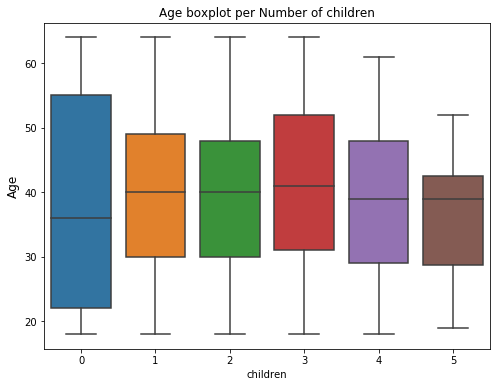

In [19]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x ='children',y='age',data=data)
plt.ylabel('Age', size=12)
plt.title('Age boxplot per Number of children', size=12)
plt.show()

In [20]:
statistics, p_value = kruskal(data[data.children==0].age,
                              data[data.children==1].age,
                              data[data.children==2].age,
                              data[data.children==3].age,
                              data[data.children==4].age,
                              data[data.children==5].age)

print('The Kruskal–Wallis H statistic={} and the p-value={}'.format(statistics, p_value))

The Kruskal–Wallis H statistic=8.43495351917709 and the p-value=0.13383780577541018


We can see that people with no children graph has two modes: Early Twenties and Late Fifties - Early Sixties. The boxplots also show that the central tendency and the variability of the people with no children age is different than the other groups.<br>
The other distribution graphs show unimodal distributions. The box plots show close medians and intersected IQRs, which may imply a low correlation between the age and the number of children .<br>
The **Kruskal-Walis** obtained p-value is higher than the significance level, therefore we fail to reject the null hypothesis. Meaning we can't say that the age and number of children are dependent.<br>

 We considered the number of children as categorical data to investigate its relation to the age variable. Then it goes without saying that we need to do the same for our target variable.

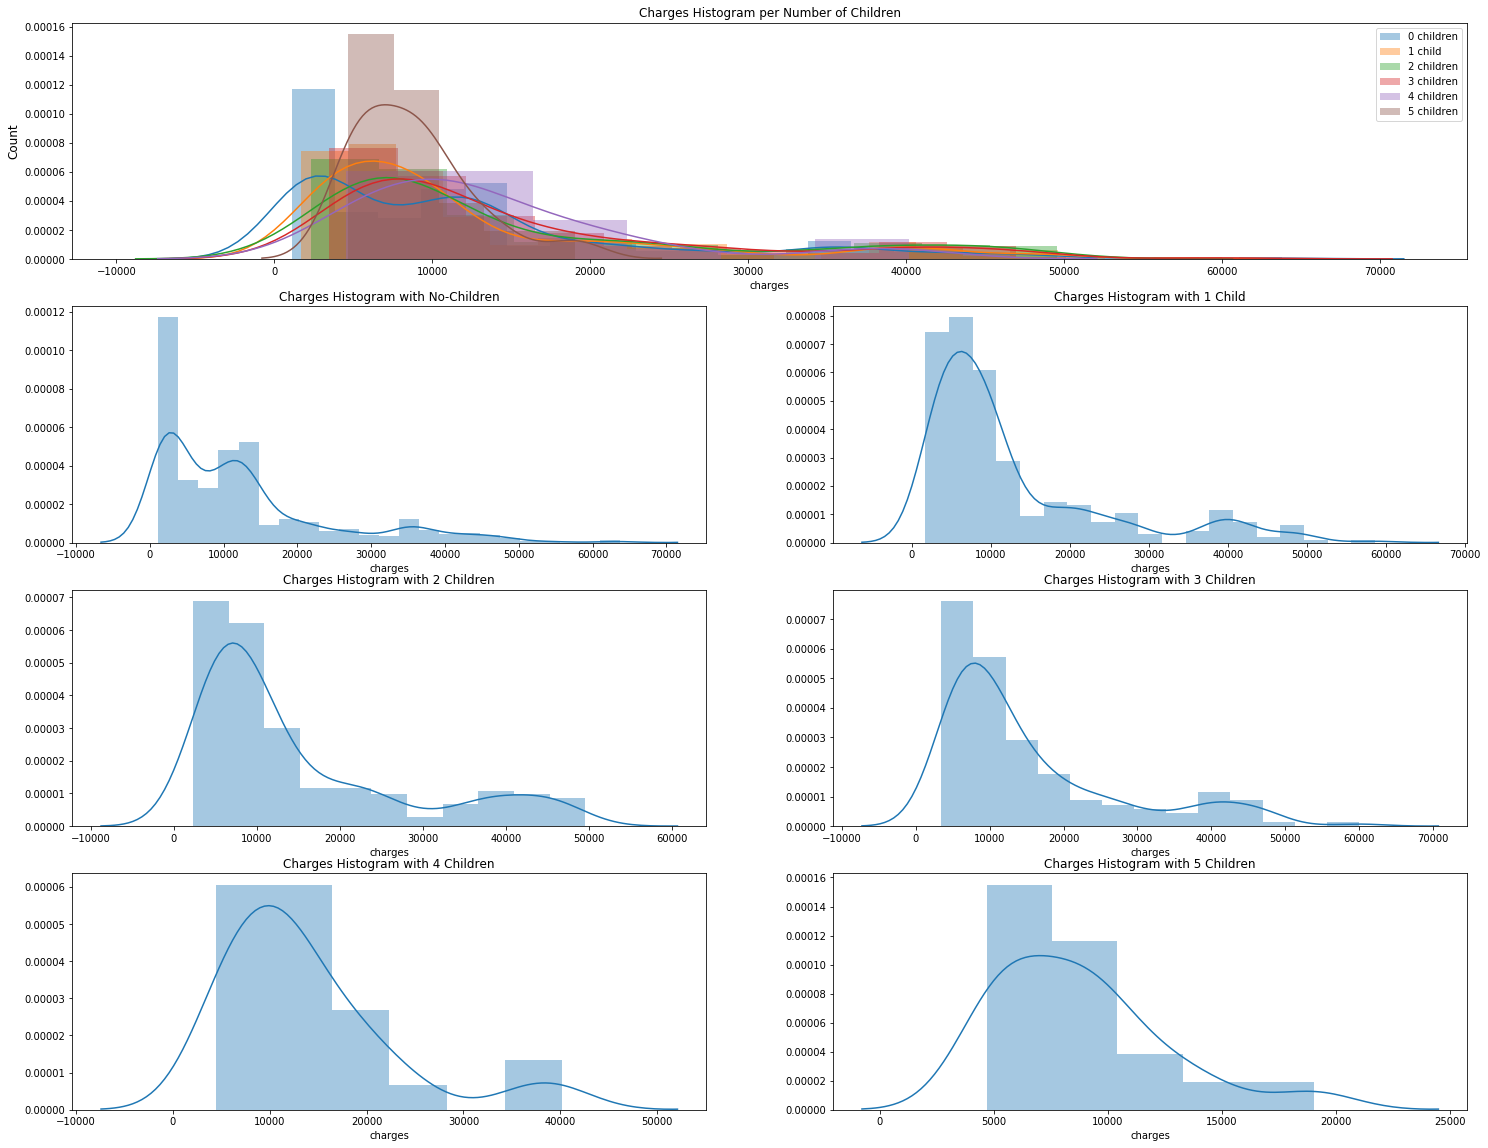

In [21]:
fig = plt.figure(figsize=(25, 20),constrained_layout=False)

gs = fig.add_gridspec(nrows=4, ncols=2)

ax=[]
for i in [1,2,3]:
        ax.append([fig.add_subplot(gs[i, 0]),fig.add_subplot(gs[i, 1])])

ax3 = fig.add_subplot(gs[0, :])

sns.distplot(data[data.children==0].charges,label='0 children',ax=ax[0][0])
ax[0][0].set_title('Charges Histogram with No-Children', size=12)
sns.distplot(data[data.children==1].charges,label='1 child',ax=ax[0][1])
ax[0][1].set_title('Charges Histogram with 1 Child', size=12)
sns.distplot(data[data.children==2].charges,label='2 Children',ax=ax[1][0])
ax[1][0].set_title('Charges Histogram with 2 Children', size=12)
sns.distplot(data[data.children==3].charges,label='3 Children',ax=ax[1][1])
ax[1][1].set_title('Charges Histogram with 3 Children', size=12)
sns.distplot(data[data.children==4].charges,label='4 Children',ax=ax[2][0])
ax[2][0].set_title('Charges Histogram with 4 Children', size=12)
sns.distplot(data[data.children==5].charges,label='5 Children',ax=ax[2][1])
ax[2][1].set_title('Charges Histogram with 5 Children', size=12)

sns.distplot(data[data.children==0].charges,label='0 children',ax=ax3)
sns.distplot(data[data.children==1].charges,label='1 child',ax=ax3)
sns.distplot(data[data.children==2].charges,label='2 children',ax=ax3)
sns.distplot(data[data.children==3].charges,label='3 children',ax=ax3)
sns.distplot(data[data.children==4].charges,label='4 children',ax=ax3)
sns.distplot(data[data.children==5].charges,label='5 children',ax=ax3)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Charges Histogram per Number of Children', size=12)
ax3.legend()

plt.show()

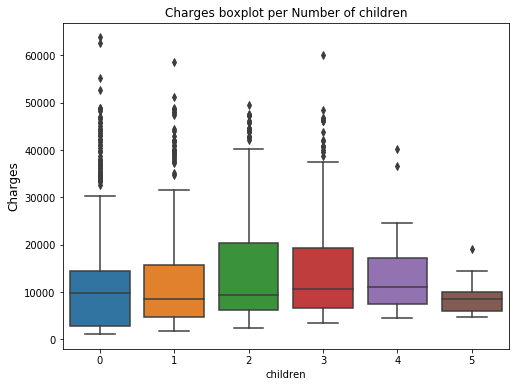

In [22]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x ='children',y='charges',data=data)
plt.ylabel('Charges', size=12)
plt.title('Charges boxplot per Number of children', size=12)
plt.show()

In [23]:
statistics, p_value = kruskal(data[data.children==0].charges,
                              data[data.children==1].charges,
                              data[data.children==2].charges,
                              data[data.children==3].charges,
                              data[data.children==4].charges,
                              data[data.children==5].charges)

print('The Kruskal–Wallis H statistic={} and the p-value={}'.format(statistics, p_value))

The Kruskal–Wallis H statistic=29.487065628030848 and the p-value=1.8604847983610864e-05


When we consider the number of children as a categorical variable, we obtain different distributions of charges. In both the histogram and boxplot graphs, We can see that the people with five children have the lowest spread. With charges going from 5000 till 20000 and 75% paying 10000 or less. Whereas three-quarters of the people with two children, for example, pay 20000 or less.<br>
The **Kruskal–Wall** obtained p-value of $1,86e^-05$ is less than our significant level. So we can reject the null Hypothesis $H_0$. The obtained results show that the variables: number of children and  medical charges are dependent variables.<br>

As a result of this analysis, we will train our regression model using the two strategies: 
- Considering children as a numeric variable.
- Considering children as a categorical variable and creating dummy variables. 
 

#### Categorical and Boolean Features:

We will use the **$\chi^2$ Test** to evaluate the dependency between the categorical and boolean features. First, we choose our significance level as $\alpha=0.05$. The test hypothesis for each two variables test can be formulated as :<br>
- $H_0$: The observed frequencies match the expected frequencies, so the two variables are independent.
- $H_1$: The observed frequencies don't match the expected frequencies, so the two variables are dependent.

In [24]:
alpha = 0.05
categorical = ['sex','smoker','region']
chi_stats = pd.DataFrame(columns = ['Feature1','Feature2','critical','stat','pval']) #dataframe where we store the results of each test

for i in range(len(categorical)):
    for j in range(i+1,len(categorical)):
            # Create the contingency table
            table = pd.crosstab(data[categorical[i]], data[categorical[j]], rownames=[categorical[i]], colnames=[categorical[j]])
            # Compute the Chi-square stat and p-value
            stat, pval, degreeFreedom, expected = chi2_contingency(table)
            # Compute the critical chi-square value
            critical = chi2.ppf(1-alpha, degreeFreedom) 
            # Append the dataframe
            chi_stats=chi_stats.append(pd.Series([categorical[i],
                                                  categorical[j],
                                                  critical,
                                                  stat,
                                                  pval],
                             index=chi_stats.columns),
                             ignore_index=True)
chi_stats

,Feature1,Feature2,critical,stat,pval
0,sex,smoker,3.841459,7.392911,0.006548
1,sex,region,7.814728,0.435137,0.932892
2,smoker,region,7.814728,7.343478,0.061720


- **Sex** and **Smoker**: 
 - The test statistic is higher than the critical value **So** we can reject the $H_0$. 
 - The p-value is smaller than the significance level **So** we can reject the null hypothesis $H_0$. 
 - Based on the interpretation of both, the test statistic and the p-value, the two features are ***dependent***.<br>
- **Sex** and **Region**: 
 - The test statistic is less than the critical value **So** we fail to reject the null hypothesis $H_0$. 
 - The p-value is higher than the significance level **So** we fail to reject the null hypothesis $H_0$. 
 - Based on the interpretation of both, the test statistic and the p-value, the two features are ***independent***.<br>
- **Smoker** and **Region**: 
 - The test statistic is less than the critical value **So** we fail to reject the null hypothesis $H_0$. 
 - The p-value is higher than the significance level **So** we fail to reject the null hypothesis $H_0$. 
 - Based on the interpretation of both, the test statistic and the p-value, the two features are ***independent***.<br>

#### Numeric Features Vs Boolean Features:

To evaluate the correlation between the numeric features and the boolean, we will use the **Point Biserial correlation coefficient**.
As a reminder the boolean features that we will check are : Sex, Smoker, North, East.

In [25]:
Biserial_Coefs = pd.DataFrame(columns = ['Feature1','Feature2','Biserial']) #dataframe where we store the coefficients

for num in ['age','bmi','children']:
    for boolien in ['sex','smoker','North','East']:
        Biserial_Coefs=Biserial_Coefs.append(pd.Series([num,boolien,pointbiserialr(data[num],data[boolien])[0]],
                             index=Biserial_Coefs.columns),
                             ignore_index=True)
Biserial_Coefs

,Feature1,Feature2,Biserial
0,age,sex,-0.020856
1,age,smoker,-0.025019
2,age,North,0.001772
3,age,East,-0.008245
4,bmi,sex,0.046371
5,bmi,smoker,0.003750
6,bmi,North,-0.235113
7,bmi,East,0.122011
8,children,sex,0.017163
9,children,smoker,0.007673


The coefficients show no correlation between any of the numeric features and any of the boolean ones.

#### Numeric Features Vs Categorical Feature:

As we did with our target variable, we will use the **Kruskal–Wallis H test** and the **Levene test** to evaluate the correlation between each numeric feature and the **Region** feature. Our significance level for both tests will be: $\alpha=0.05$.<br>
The **Kruskal–Wallis** hypothesis for each feature :<br>
- $H_0$: There is no difference among the four groups of medians.
- $H_1$: At least one group differs significantly from the overall median.<br>

In [26]:
K_stats = pd.DataFrame(columns = ['Feature','stat','pval','pval>alpha']) #dataframe where we store the results of each test

for feature in ['age','bmi','children']:
    stat, p_value = kruskal(data[data.region=='southeast'][feature],
                            data[data.region=='southwest'][feature],
                            data[data.region=='northwest'][feature],
                            data[data.region=='northeast'][feature])
    K_stats=K_stats.append(pd.Series([feature,stat,p_value,p_value>alpha],
                             index=K_stats.columns),
                             ignore_index=True)
K_stats

,Feature,stat,pval,pval>alpha
0,age,0.413816,9.373739e-01,True
1,bmi,94.688570,2.153987e-20,False
2,children,2.375439,4.982230e-01,True


- **Region** and **Age**: The p-value is higher than the significance level $\alpha$, so we fail to reject the null hypothesis $H_0$. There is no significant difference between the age median in the four regions.<br>
- **Region** and **BMI**: The p-value is lower than the significance level $\alpha$, so we can reject the null hypothesis $H_0$. At least one group has a BMI median significantly different from the other groups, so the **Region** and the **BMI** can be dependent.<br>
- **Region** and **Children**: The p-value is higher than the significance level $\alpha$, so we fail to reject the null hypothesis $H_0$. There is no significant difference between the number of children median in the four regions.<br>


The **Levene test** hypothesis for each feature :<br>
- $H_0$: There is no difference among the four groups variances.
- $H_1$: At least one group differs significantly from the overall median.<br>

In [27]:
L_stats = pd.DataFrame(columns = ['Feature','stat','pval','pval>alpha']) #dataframe where we store the results of each test

for feature in ['age','bmi','children']:
    stat, p_value = levene(data[data.region=='southeast'][feature],
                            data[data.region=='southwest'][feature],
                            data[data.region=='northwest'][feature],
                            data[data.region=='northeast'][feature])
    L_stats=L_stats.append(pd.Series([feature,stat,p_value,p_value>alpha],
                             index=L_stats.columns),
                             ignore_index=True)
L_stats

,Feature,stat,pval,pval>alpha
0,age,0.015291,0.997421,True
1,bmi,6.200431,0.000350,False
2,children,0.655289,0.579670,True


- **Region** and **Age**: The p-value is higher than the significance level $\alpha$, so we fail to reject the null hypothesis $H_0$. There is no significant difference between the age variances in the four regions.<br>
- **Region** and **BMI**: The p-value is lower than the significance level $\alpha$. So we can reject the null hypothesis $H_0$. At least one group has a BMI variance significantly different from the other groups, so the **Region** and the **BMI** can be dependent.<br>
- **Region** and **Children**: The p-value is higher than the significance level $\alpha$, so we fail to reject the null hypothesis $H_0$. There is no significant difference between the number of children variance in the four regions.<br>


#### EDA conclusions:

- The most pronounced correlation between our target variable and the features is with the smoking feature. Although The Numerical features have a low linear correlation to the medical charges, the age variable also shows some good predictive potential. Considering the number of children as categorical seems a promising strategy.
- The correlated features: 
	- Sex and Smoking, 
	- Region and BMI.
- The strategies inspired by this analysis: 
   1. Create two boolean variables based on the region variable: North and East.
   2. Consider the number of children categorical and create dummy variables.
   3. Separate the BMI feature into bins.
   4. Separate the Age feature into bins, although we suspect the age feature to be more informative as it is.



## Data Pre-Processing

First step in our data preprocessing step , is to seperate our dataset into Features and Target.

In [28]:
X = data.drop(columns=['charges'])
y = data['charges']
X.head()

,age,sex,bmi,children,smoker,region,North,East
0,19,0,27.900,0,1,southwest,0,0
1,18,1,33.770,1,0,southeast,0,1
2,28,1,33.000,3,0,southeast,0,1
3,33,1,22.705,0,0,northwest,1,0
4,32,1,28.880,0,0,northwest,1,0


Second we will create bins for the **bmi** feature.<br>
We will create BMI categories based on the following table :

| Category | BMI |
| :--- | --- |
| Severe Thinness | < 16 |
| Moderate Thinness | 16 - 17 |
| Mild Thinness | 17 - 18.5 |
| Normal | 18.5 - 25 |
| Overweight | 25 - 30 |
| Obese Class I | 30 - 35 |
| Obese Class II | 35 - 40 |
| Obese Class III | > 40 |



In [29]:
X['bmi_classes']= pd.cut(data['bmi'],
              bins=[0,16,17,18.5,25,30,35,40,60],
              right=False,
              labels=["Severe Thinness", "Moderate Thinness",
                      "Mild Thinness","Normal","Overweight",
                      "Obese Class I","Obese Class II","Obese Class III"]
             )
X.head()

,age,sex,bmi,children,smoker,region,North,East,bmi_classes
0,19,0,27.900,0,1,southwest,0,0,Overweight
1,18,1,33.770,1,0,southeast,0,1,Obese Class I
2,28,1,33.000,3,0,southeast,0,1,Obese Class I
3,33,1,22.705,0,0,northwest,1,0,Normal
4,32,1,28.880,0,0,northwest,1,0,Overweight


To simplify the encoding of the children variable, I will replace the values with a more meaningful string.

In [30]:
X['children_as_categories'] =  X['children'].replace([0,1,2,3,4,5],['0 children','1 child','2 children','3 children','4 children','5 children'])
X.head()

,age,sex,bmi,children,smoker,region,North,East,bmi_classes,children_as_categories
0,19,0,27.900,0,1,southwest,0,0,Overweight,0 children
1,18,1,33.770,1,0,southeast,0,1,Obese Class I,1 child
2,28,1,33.000,3,0,southeast,0,1,Obese Class I,3 children
3,33,1,22.705,0,0,northwest,1,0,Normal,0 children
4,32,1,28.880,0,0,northwest,1,0,Overweight,0 children


The third step is to encode our categorical features. Since we already encoded the boolean features we will use **One hot encoding** to encode the categorical feature **Region** in addition the new features : **bmi_classes** and **children_as_categories**.

In [31]:
X = pd.get_dummies(X, prefix="", prefix_sep="")
X.head()

,age,sex,bmi,children,smoker,North,East,northeast,northwest,southeast,southwest,Severe Thinness,Moderate Thinness,Mild Thinness,Normal,Overweight,Obese Class I,Obese Class II,Obese Class III,0 children,1 child,2 children,3 children,4 children,5 children
0,19,0,27.900,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,18,1,33.770,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,28,1,33.000,3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,33,1,22.705,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,32,1,28.880,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


Now we will split our data into training and test set. As mentioned earlier we will use 0.75 for training and 0.25 for test.

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=123)
X_train.head()

,age,sex,bmi,children,smoker,North,East,northeast,northwest,southeast,southwest,Severe Thinness,Moderate Thinness,Mild Thinness,Normal,Overweight,Obese Class I,Obese Class II,Obese Class III,0 children,1 child,2 children,3 children,4 children,5 children
417,36,0,22.60,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
600,18,0,39.16,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
280,40,0,28.12,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1276,22,0,30.40,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
603,64,0,39.05,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


The last step of our data preprocessing is features Standardization. This step is done after splitting the data to avoid any information spill into the test data. The standardized dataset will then be used with KNN and SVR.

In [33]:
Sc = StandardScaler()
Sc.fit(X_train)
X_train_sc = Sc.transform(X_train)
X_test_sc = Sc.transform(X_test)

## Prediction

In this section, we will train different regression models, and evaluate the more performant based on the regression metrics : 
- Max error: As its name states, this metric returns the maximum error between the predicted values and the true values.
- Mean absolute error : (MAE) It is the average of absolute residual errors between the predidcted and the true values.$\sum_{i=1}^{n} \frac{|y_{iPred}-y_{iTrue}|}{n}$. Since its an error the closer to 0 the better.
- Mean squared error : (MSE) Is the average of squared errors.$\sum_{i=1}^{n} \frac{(y_{iPred}-y_{iTrue})^{2}}{n}$. The best predictpr is the one with an MSE value closer to 0.
- R²-score : Or the Coefficient of Determination is computed as $1 - \frac{SS_{res}}{SS_{tot}}$. 
    - The $SS_{res}$ is the Sum of Squared Residuals $\sum_{i=1}^{n}(y_{iPred}-y_{iTrue})^{2}$. 
    - And the $SS_{tot}$ is the Total Sum of Squares i.e the sum of the differences between the true observation and the mean of the observations $\sum_{i=1}^{n}(y_{iTrue}-\bar{y})^{2}$
    - The perfect predictor will always be able to predict the true values obtaining the $SS_{res}=0$ and $R^2=1$, hence the closer we get to 1 the better. As a side note, if a model always predicts $\bar{y}$ the $SS_{tot}=SS_{res}$ and $R^2=0$, this means if we get a negative Coefficient of Determination, the model performed worse than a model always predicting the average of the observations.
    
    
 We will select the best model for each algorithm after a feature selection step using the **Permutation Feature Importance** method. And a parameter tuning step using **Grid search**.
- Permutation Feature Importance: This is a technique where the importance of a feature is assessed by randomly permuting its values. The estimator whose permutation causes the most decrease in the score is the most important. Although, Recursive Feature Elimination is wildly popular. I have chosen to use the Permutation Feature Importance instead because, in sklearn, the RFE is used with models that return the attributes coef_ or feature_importances_. In our case, we will estimate the medical charges using different algorithms, including the **KNN** that doesn't return such attributes.
- Grid search: This is an exhaustive hyperparameter optimization method in which we specify for each parameter that we want to tune several possible values, and the combination scoring the highest metric is the chosen one. The sklearn's GridSearchCV method evaluates the scoring of each using a cross-validation technique.

We will start by creating a data frame to store the metrics of each model.

In [34]:
Metrics = pd.DataFrame(columns = ['Algorithm','Number of columns','Columns','Max error','Mean absolute error','Mean squared error','R2 score'])

### Linear Regression

Linear Regression is one if not the simplest regression algorithm out there. It trys to approximate the relationship between the predictors $X_{i}$ and the target varaible $y$ with a **Linear equation** of type $y = W_{0}+\sum_{i=1}^{p} W_{i}*X_{i}$.<br>
The model aims to find the weights $W_{0<i<p}$ that minimizes the residual sum of squares $RSS = \sum_{j=1}^{n}(y_{j}-(W_{0}+\sum_{i=1}^{p} W_{i}*X_{ji}))^2$.<br> The Ordinary Least square is considered the most common method to find the most fitted regression Line, and it is the used method in the sklearn Linear regression implementation.<br>
In the following, we will try to find the most impactful features for linear regression, and we will not need to do any parameter tuning.<br>
##### Feature Selection

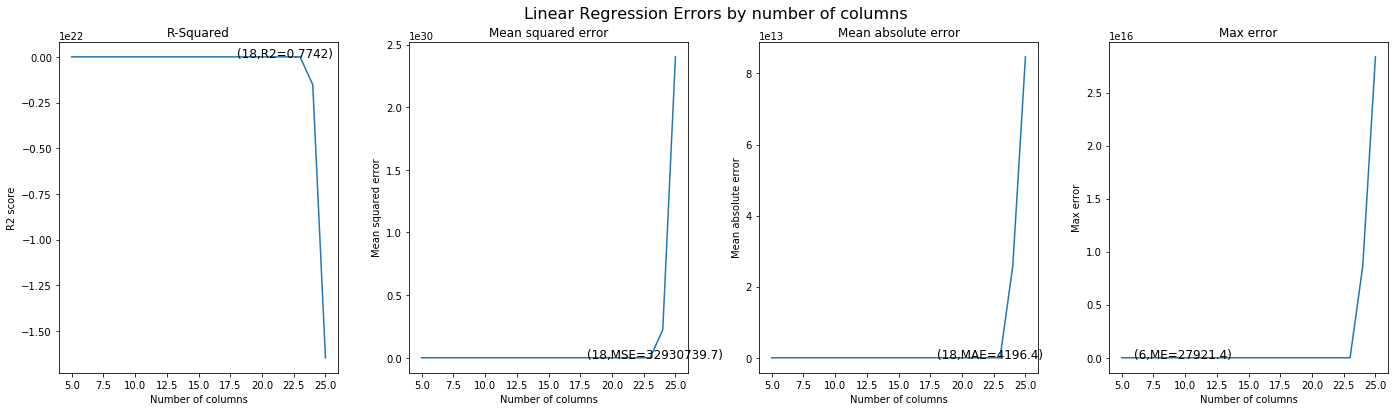

The Features Permutation Importance selected 18 columns that optimised the R2 score.
The selected columns are : Index(['2 children', '1 child', '3 children', 'Obese Class III', 'Normal',
       'East', 'southwest', 'children', 'North', '0 children', 'northeast',
       '4 children', 'Obese Class I', 'Obese Class II', 'Overweight', 'bmi',
       'age', 'smoker'],
      dtype='object')


In [35]:
Metrics = Metrics.append(permutation_importance_percolnumber(  X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'Linear Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics, algorithm='Linear Regression')
selected_Features = optimalColumns('Linear Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features]
X_test_new = X_test_sc[:,selected_Features]

The four plots show almost constant scores, then suddenly the scores get worse when the number of features exceeds 22.<br>
As explained before, the $R^2$-Score optimal point is the largest. It reaches this point in the plot with eighteen columns, with a value of 0.7742.<br>
The MSE, MAE, and ME are errors, and therefore their best scores are the lowest. Both the Mean squares and Mean absolute errors reach their optimal scores with eighteen features. These two results support the idea that we obtain the best-fitted line with eighteen columns. The max error, on the other hand, is at its lowest with only six predictors. Although the plots show very close results and the six features model is the less computationally expensive candidate. The ME numerical result translates the small error range for singular observations but doesn't guarantee the low variability that $R^2$ and MSE do. So from now on, we will trust the $R^2$-Score to guide us towards the number of predictors to choose.<br> 

The Linear Regression model doesn't need any Parameter tuning, so we will predict our test charges using the selected features.
##### Predict using the selected parameters and features

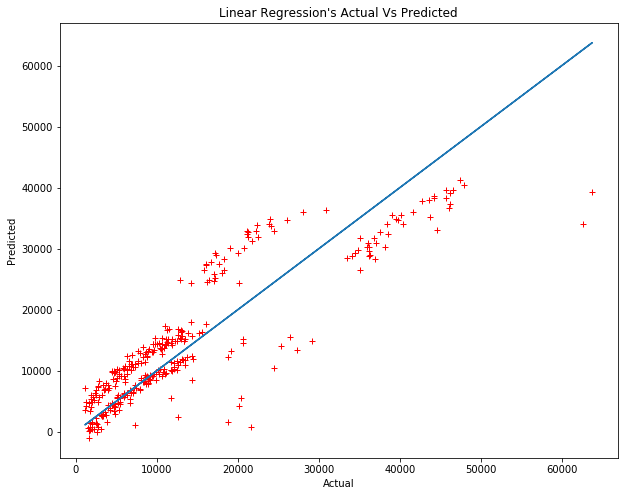

R-squared : 0.7741789566295152
Max Error : 28590.308958339003
Mean Absolute Error : 4196.390877275699
Mean Squared Error : 32930739.657293998


In [36]:
regressor = LinearRegression().fit(X_train_new, y_train)#normalize=True

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Linear Regression')

The **Actual Versus Predicted** graph shows three concentrated scatter plots around the diagonal line. This line represents a perfect regressor that would have predicted all the expected values. We can see that our model prediction is more accurate when the charges are less than 20000. Then the predicted values get higher than the real ones when they range between 20000 and 35000. And finally, the predictions get lower than the expected values when they are above 35000.

### Ridge Regression

Ridge Regression is a Linear Regression to which we applied an *L2-norm* regularization on the estimated coefficient. In Machine Learning Problems, regularisation refers to adding a constraint or a term to the loss function. It aims to shrink the possible values of the estimated coefficients and minimize the risk of overfitting.<br>
We explained earlier that the Linear Regression Loss Function is the RSS, in the Ridge Regression we add the regularization term : $\alpha*\sum_{i=1}^{p}W_{i}^2$. The $\alpha$ parameter translates the degree of penalization of the regression weights: 
- if $\alpha=0$, then the Ridge Loss function will be equivalent to the OLS one (RSS), and the weights will not be penalized.
- if $\alpha$ is too big then the regression coefficients $W_{i}->0$.

##### Feature Selection
As we did for the Linear Regression, we will select the features using the **Feature Permutation Importance** method. At this level, we will use the default regularization parameter $\alpha=1$.

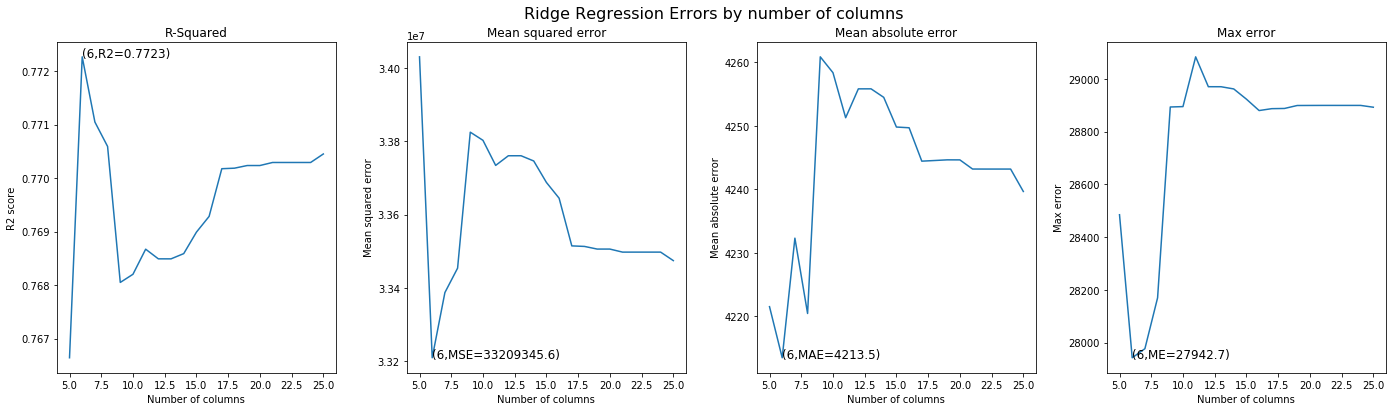

The Features Permutation Importance selected 6 columns that optimised the R2 score.
The selected columns are : Index(['Obese Class I', 'Obese Class II', 'Overweight', 'bmi', 'age',
       'smoker'],
      dtype='object')


In [37]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'Ridge Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Ridge Regression')
selected_Features = optimalColumns('Ridge Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features] 
X_test_new =  X_test_sc[:,selected_Features]


We note that we obtained a very close optimal $R^2-score$ to the coefficient we computed for the Linear Regression with only six features. These six features are the optimal model for the four scores.<br>
This difference between the Linear regression and Ridge regression can be due to the overfitting of the Linear regression with eighteen predictors.<br>
We note that four of the six selected features are related to the weight of the individuals. This translates the impact of the BMI on the medical charges.

##### Parmeter Tuning
We will be tuning the strength of the regularization by choosing values of $\alpha$ at the two ends of the spectrum : 
- Null and approximately null: To minimize the penalization.
- Large values: To maximize the penalization.

In [38]:
regressor = Ridge()
parameters = {'alpha':[0,0.0001,0.001, 0.01,0.1,0.5, 1,5, 10,100,1000]}
gs = GridSearchCV(regressor, parameters, scoring= 'r2',)
gs.fit(X_train_new, y_train)
print('Ridge best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

Ridge best parameters : {'alpha': 1} with a score of 0.7422092751282019


The Grid Search obtained that the best value for our hyperparameter $\alpha$ is 1, which is its default value in the sklearn implemantation. 
#### Predict using the selected parameters and features

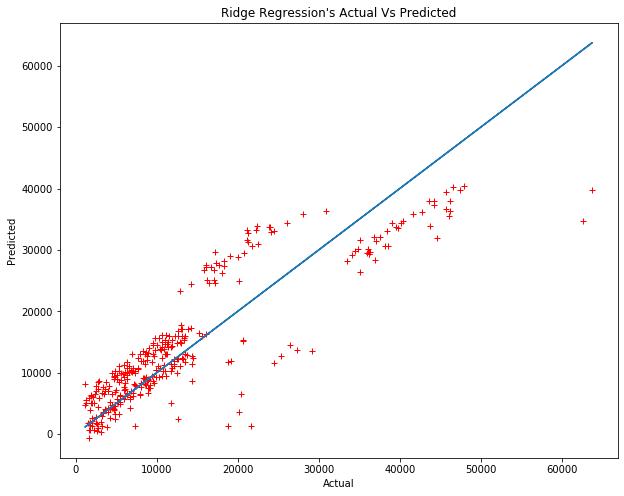

R-squared : 0.7722684293794121
Max Error : 27942.744279628423
Mean Absolute Error : 4213.498846906648
Mean Squared Error : 33209345.55930506


In [39]:
regressor = gs.best_estimator_

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Ridge Regression')

- The Ridge's **Actual Versus Predicted** graph shows the same main three sections as the Linear Regression graph. 
- The resulting *R2-Score* is slightly lower than the score obtained with the Linear Regression, equivalent to a null regularization term or an $\alpha$ equal to 0. The difference is too small to interpret it as a too harsh regularization, but we note that *L2-penalization* of the RSS didn't improve the score. 

### Lasso Regression

Lasso or *Least absolute shrinkage and selection operator* is Linear regression with an *L1-norm* regularization. It performs regularization to minimize the overfitting of the regression coefficients, and at the same time, select the features by canceling some coefficients $W_{i}$. The Lasso regularization term is $\alpha \sum_{i=1}^{p}|W_{i}|$, and as per the Ridge Regression, the $\alpha$ translates the strength of the penalization on the regression weights.

Since Lasso performs an operator selection, we will use the LassoCV method from the sklearn library to tune the alpha parameter and select the features simultaneously. The results will then be compared to the feature permutation importance and grid search result.

**1. Lasso only**

The cross-validation Lasso allows us to choose the optimal regularization coefficient $alpha$, either by specifying the candidates' alphas or specifying the length of the path and the number of alphas to try. We will indicate to the method to try 100 potential $\alpha$'s with $\frac{\alpha_{min}}{\alpha_{max}}=1e^{-3}$.

In [40]:
regressor_Lasso = LassoCV(eps=1e-3,n_alphas=100).fit(X_train_sc,y_train)
Lasso_selected_columns = X_train.columns[np.abs(regressor_Lasso.coef_)>0].tolist()
print('The Lasso chosen columns are : {}'.format(Lasso_selected_columns))
print('The selected alpha :{}'.format(regressor_Lasso.alpha_))

The Lasso chosen columns are : ['age', 'bmi', 'children', 'smoker', 'North', 'northeast', 'southwest', 'Overweight', 'Obese Class I', 'Obese Class II', '0 children', '2 children', '4 children']
The selected alpha :116.85956097230891


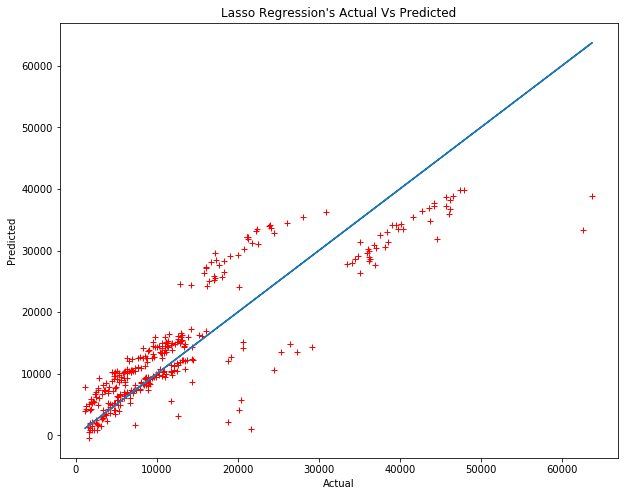

R-squared : 0.7696593658872404
Max Error : 29216.212849195384
Mean Absolute Error : 4198.051436456514
Mean Squared Error : 33589816.70286052


In [41]:
y_pred = regressor_Lasso.predict(X_test_sc)

plot_ActualVsPredicted(regressor_Lasso,
                       X_test_sc,
                       y_test,
                       'Lasso Regression')

The Cross-Validation Lasso implementation selected thirteen features with a regularization coefficient of 116.86.<br>
 The resulted **Actual Versus Predicted** graph showed a similar distribution as the first graphs. But the obtained $R^2$-Score is lower than the Linear and Ridge regression.<br>
 Let's try to optimize the Lasso model with the feature permutation importance method and the grid search, and see if the Lasso is a better regressor.

**2. Feature Permutation Importance and Grid Search**
##### Feature Selection

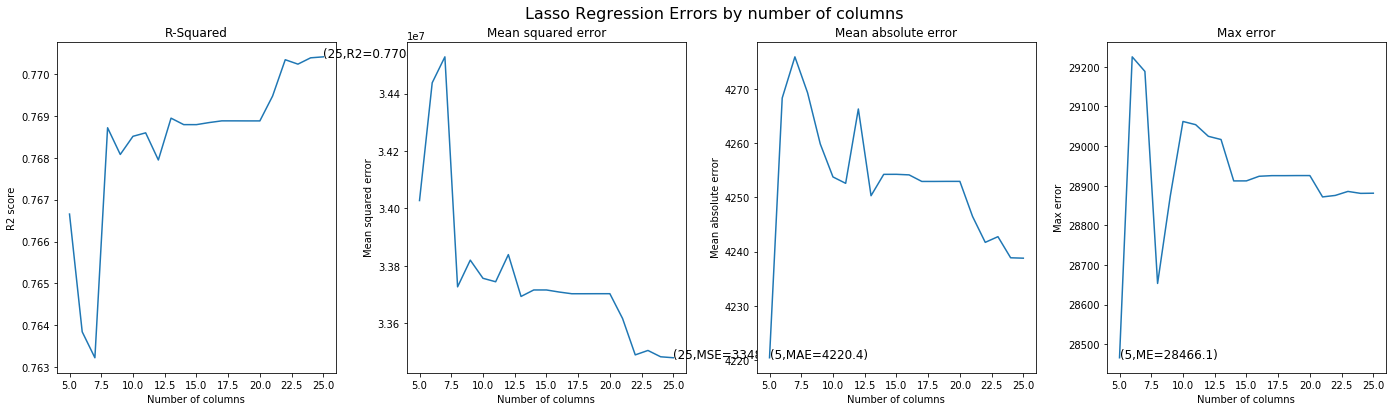

The Features Permutation Importance selected 25 columns that optimised the R2 score.
The selected columns are : Index(['2 children', 'Mild Thinness', '5 children', '1 child',
       'Obese Class III', 'Severe Thinness', 'southeast', 'northwest',
       'Moderate Thinness', 'sex', 'East', 'southwest', 'children',
       '3 children', 'Normal', 'North', 'northeast', 'Obese Class I',
       '4 children', '0 children', 'Obese Class II', 'Overweight', 'bmi',
       'age', 'smoker'],
      dtype='object')


In [42]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'Lasso Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Lasso Regression')
selected_Features = optimalColumns('Lasso Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features] 
X_test_new = X_test_sc[:,selected_Features]

The results of the feature permutation importance are not what I expected. 
- The best $R^2$ and MSE results were obtained with all 25 features. 
- The ME and MAE optimal points were reached, on the other side of the range, with only five features. 

##### Parmeter Tuning

In [43]:
regressor = Lasso(max_iter=50000)
parameters = {'alpha':[20,100,200,500]}
gs = GridSearchCV(regressor, parameters, scoring= 'r2')
gs.fit(X_train_new, y_train)
print('Lasso best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

Lasso best parameters : {'alpha': 100} with a score of 0.7429896640133844


Grid search returned a regularization coefficient equal to 100, a very close value to the LassoCV.<br>
The default $\alpha$ in the sklearn implementation is equal to one. The fact that we used the default value in our feature selection step, makes me think that the penalization was not strong enough to allow feature selection.<br>

#### Predict using the selected parameters and features

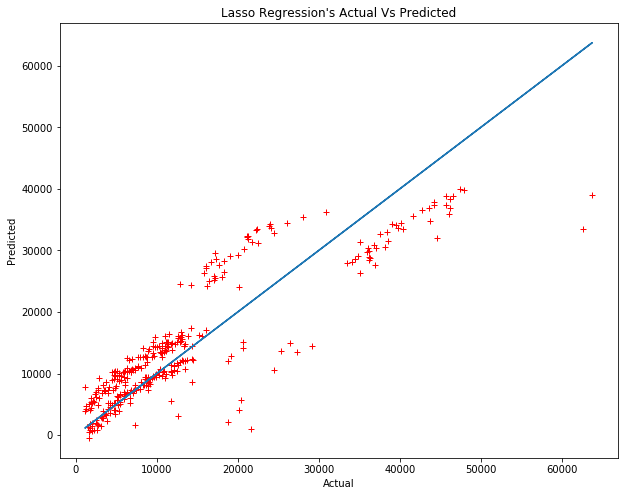

R-squared : 0.7698276246070256
Max Error : 29177.977550532552
Mean Absolute Error : 4202.0072341672685
Mean Squared Error : 33565280.08743436


In [44]:
regressor = gs.best_estimator_

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Lasso Regression')

The results of our model approximately equal those of the LassoCV, which can be explainable by the fact that we are using all the features, and a coefficient of 100.<br>
Compared to the previous results, the Lasso scored the lowest hence we will not consider it a candidate.

### ElasticNet Regression

It is a linear model that combines the *L1-norm* and *L2-norm* regularization.<br> 
The ElasticNet regularization term is : $\lambda [\sum_{i=1}^{p} \alpha |W_{i}|+\sum_{i=1}^{p} (1-\alpha) W_{i}^2]$.
- Ridge regression will be a special case of the Elastic Net when $\alpha = 0$.
- Lasso regression will be a special case of the Elastic Net when $\alpha = 1$.


As per the Lasso regression, the *L1-norm* allows Elastic Net to select the most predictive features, and the stability of the *L2-norm* permits overcoming the Lasso limitations. The Lasso operator selection has two known limitations : 
1. If the number of features p is higher than the number of observations n, Lasso selects at most n variables. 
2. In the case of correlated features, the Lasso regression tends to select one and ignore the others. 
In our case, we are not concerned with the first limitation since we have a training set of n=1003 observations and only p=25 features. On the other hand, the second limitation can affect our model since we have added some correlated variables in the EDA step, namely the new regions and BMI variables. 


 We will use, at first, cross-validation ElasticNet to tune the parameters and select the features, then compare the result with the feature permutation and grid search results.
 
**1. ElasticNet only**

the ElasticNetCV method from the sklearn library. This method will allow us to  to tune the parameters : $\alpha$ and $l1\_ratio$. The sklearn implementation represent the regularisation term as : $a * ||w||_1 + 0.5 * b * ||w||_2^2$ with : 
- $\alpha = a+b$, if $\alpha$ is null the Elastic Net will be equivalent to Linear Regression.
- $l1\_ratio=\frac{a}{a+b}$, according to sklearn it a mixing parameter if equal to 1 it is an *L1- penality*, if equal to 0 it is an *L2- penality*.


In [45]:
regressor_EN = ElasticNetCV(l1_ratio=[.01,.1,.3,.5,.7,.8,.9,.95,.99],
                               eps=1e-4,
                               n_alphas=1000).fit(X_train_sc,y_train)
EN_selected_columns = X_train.columns[np.abs(regressor_EN.coef_)>0].tolist()
print('The Lasso chosen columns are : {}'.format(EN_selected_columns))
print('The selected alpha :{}'.format(regressor_EN.alpha_))
print('The selected l1 ratio :{}'.format(regressor_EN.l1_ratio_))

The Lasso chosen columns are : ['age', 'sex', 'bmi', 'children', 'smoker', 'North', 'East', 'northeast', 'southeast', 'southwest', 'Moderate Thinness', 'Mild Thinness', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III', '0 children', '1 child', '2 children', '3 children', '4 children', '5 children']
The selected alpha :1.2979324694672343
The selected l1 ratio :0.99


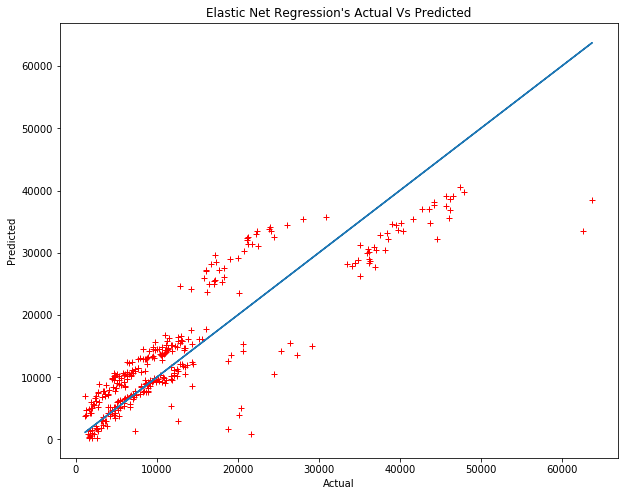

R-squared : 0.7703940210886887
Max Error : 29105.685715245207
Mean Absolute Error : 4243.803273736062
Mean Squared Error : 33482684.352324527


In [46]:
y_pred = regressor_EN.predict(X_test_sc)

plot_ActualVsPredicted(regressor_EN,
                       X_test_sc,
                       y_test,
                       'Elastic Net Regression')

The ElasticNet cross-validation model didn't show much selectivity regarding the features; only two predictors were dropped in the returned model. The selected L1_ratio is equal to 0.99, which is in favor of the L1-penality. The selected alpha is equal to 1.29.<br>
If we take into consideration the fact that both use the *L1-norm* penalty, the $R^2$-score of the ElasticNet has improved compared to the Lasso one. The improvement may be due to the presence of a second-degree term in the regularization, which makes the loss function convex and its optimization more stable.<br>
If we compare the results to the Linear and Ridge regressions, the ElasticNetCV didn't show much promise but let's see how it will perform after the Feature Importance Permutation and Grid Search.


**2. Feature Importance Permutation and Grid Search**
##### Feature Selection

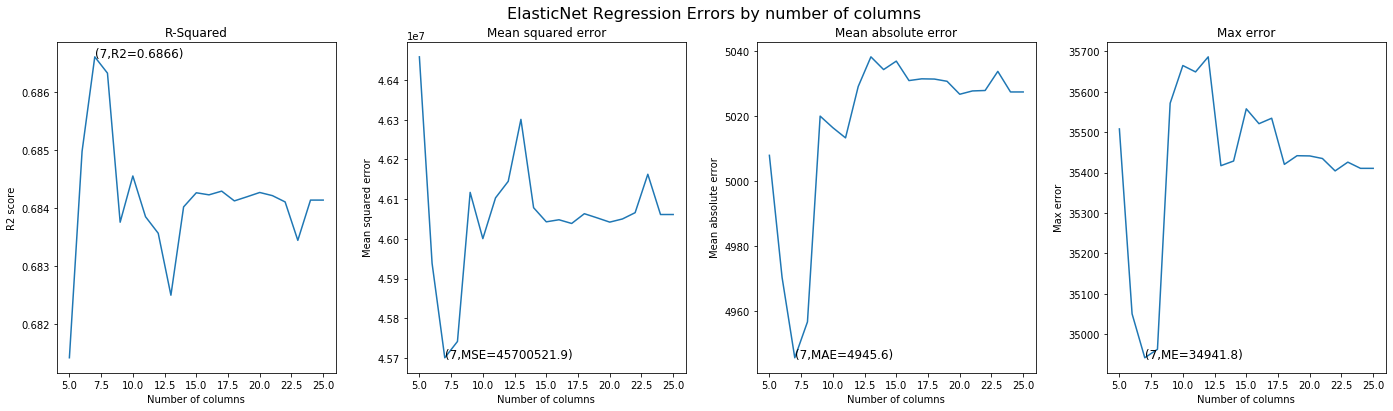

The Features Permutation Importance selected 7 columns that optimised the R2 score.
The selected columns are : Index(['Normal', 'Obese Class I', 'Obese Class II', 'Overweight', 'bmi', 'age',
       'smoker'],
      dtype='object')


In [47]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'ElasticNet Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='ElasticNet Regression')
selected_Features = optimalColumns('ElasticNet Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features] 
X_test_new = X_test_sc[:,selected_Features]

The Feature Permutation Importance selected seven columns: The six that have been selected with the Ridge algorithm in addition to the feature: Normal. We end up with five out of seven predictors all related to Weight.


##### Parmeter Tuning

In [48]:
regressor = ElasticNet()
parameters = {'alpha':[0.0001,0.001, 0.01,0.1,0.5, 1, 1.5, 2,3,4,5, 10,100],
             'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gs = GridSearchCV(regressor, parameters, scoring= 'r2')
gs.fit(X_train_new, y_train)
print('ElasticNet best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

ElasticNet best parameters : {'alpha': 0.1, 'l1_ratio': 0.9} with a score of 0.7413402290924583


The L1_ratio is close to the ElasticNetCV one, which is in favor of the *L1-penalty*. The difference between the two is that the alpha selected by the GridSearch is equal to 0.1, whereas the ElasticNetCV returned 1.3, meaning that the regularization in our model will not be as strong as the ElasticNetCV.

##### Predict using the selected parameters and features

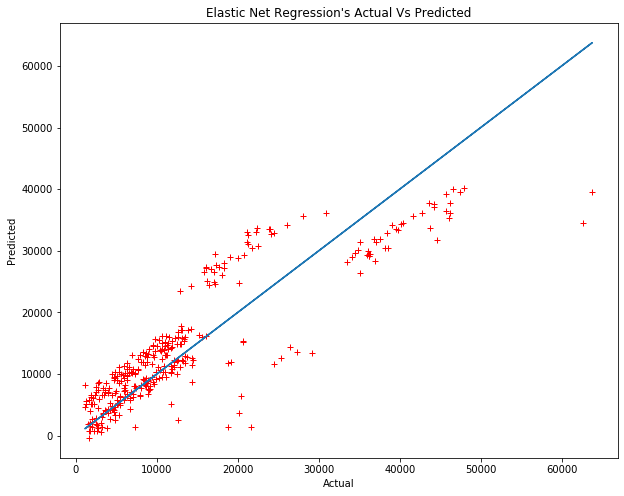

R-squared : 0.7721353078031785
Max Error : 28123.83483939148
Mean Absolute Error : 4220.013803118124
Mean Squared Error : 33228758.24071103


In [49]:
regressor = gs.best_estimator_

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Elastic Net Regression')

The **Actual Versus Predicted** graph shows the same three groups, the $R^2$-score of the ElasticNet is very close to the Ridge score of 0.7722. 

### Polynomial Regression

Polynomial regression is a regression where we want to estimate the target variable $y$ using a Polynom of degree m of the features $X$.
- Simple Polynomial Regression: $y=w_0+\sum_{i=1}^{i=m}w_i.x^i$
- Multiple Polynomial Regression with no interactions: $y=w_0+w_1.x_1+w_2.x_2+w_3.x_3+w_4.x_1^2+w_5.x_2^2+w_6.x_3^2+.....+w_k.x_1^m+w_{k+1}.x_2^m+w_{k+2}.x_3^m$
- Multiple Polynomial Regression with interactions example of second degree with two features $x_1$ and $x_2$: $y=w_0+w_1.x_1+w_2.x_2+w_3.x_1^2+w_4.x_2^2+w_5.x_1.x_2$

In our case, we will be using a second-degree polynomial as it is the most used degree and to avoid any overfitting due to the complexity of higher degrees. We will be using the multiple polynomial regression with the interaction model, which will allow us to consider the impact of the interactions between the features in target prediction.

***The total number of features:*** *1 term of power 0 + 25 terms of power 1 + 25 terms of power 2 + $C_{25}^2$=300 terms of features interactions*<br>
We will be able to generate this polynomial through the sklearn method PolynomialFeatures.

In [50]:
## 2nd Degree Polynomial Features
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_sc)
X_test_poly = polynomial_features.transform(X_test_sc)
features_name = polynomial_features.get_feature_names()

##### Feature Selection
To select the most impactful predictors from the generated 351, we will follow the same strategy for the Polynomial regression as we did for the Linear regressions. 

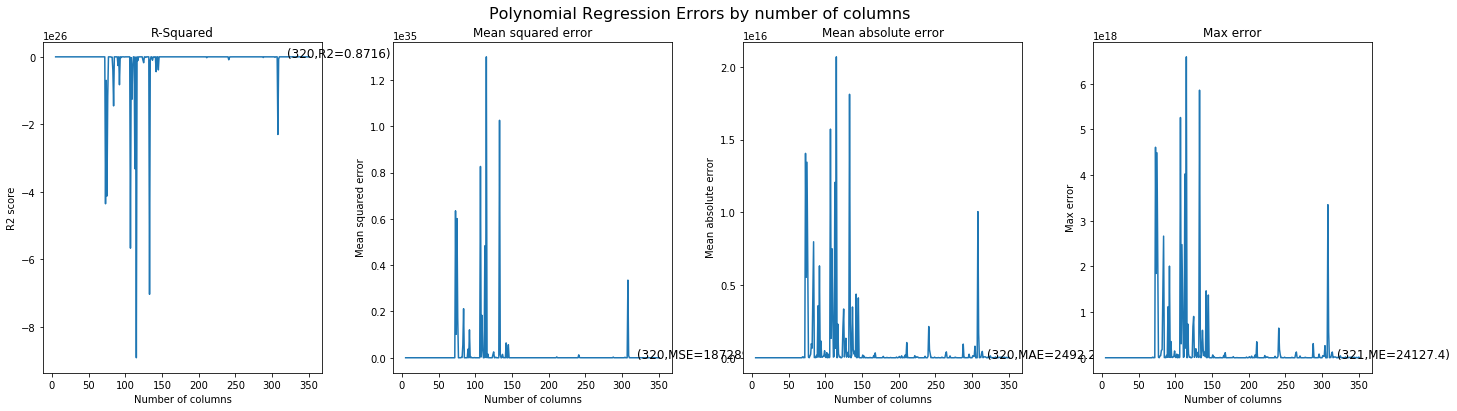

The Features Permutation Importance selected 320 columns that optimised the R2 score.
The first 25 selected columns are : [['(bmi)^2'], ['sex', 'bmi'], ['(age)^2'], ['bmi', 'smoker'], ['Obese Class II', '0 children'], ['bmi'], ['Moderate Thinness', 'Mild Thinness'], ['Moderate Thinness', '5 children'], ['Mild Thinness', '5 children'], ['Moderate Thinness', 'Obese Class III'], ['age', '1 child'], ['age'], ['(North)^2'], ['southeast', 'Mild Thinness'], ['southeast', '0 children'], ['Obese Class III', '0 children'], ['sex', 'northeast'], ['southwest', '5 children'], ['Moderate Thinness', '0 children'], ['children', 'Moderate Thinness'], ['Obese Class II', '2 children'], ['age', '2 children'], ['North', '1 child'], ['age', 'Mild Thinness'], ['Moderate Thinness', '4 children']]


In [51]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_poly,
                                                             y = y_train,
                                                             X_test = X_test_poly,
                                                             y_test = y_test,
                                                             algorithm = 'Polynomial Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Polynomial Regression')
selected_Features = optimalColumns('Polynomial Regression',Metrics,X_train.columns,features_name)
X_train_new = X_train_poly[:,selected_Features] 
X_test_new = X_test_poly[:,selected_Features]

The $S^2$-score graph shows some negative values. These values mean that some features combination perform worse than the baseline model that always predicts the mean of the charges $\bar{y}$. To make the graph clearer let's zoom only on the positive $R^2$-Scores. 

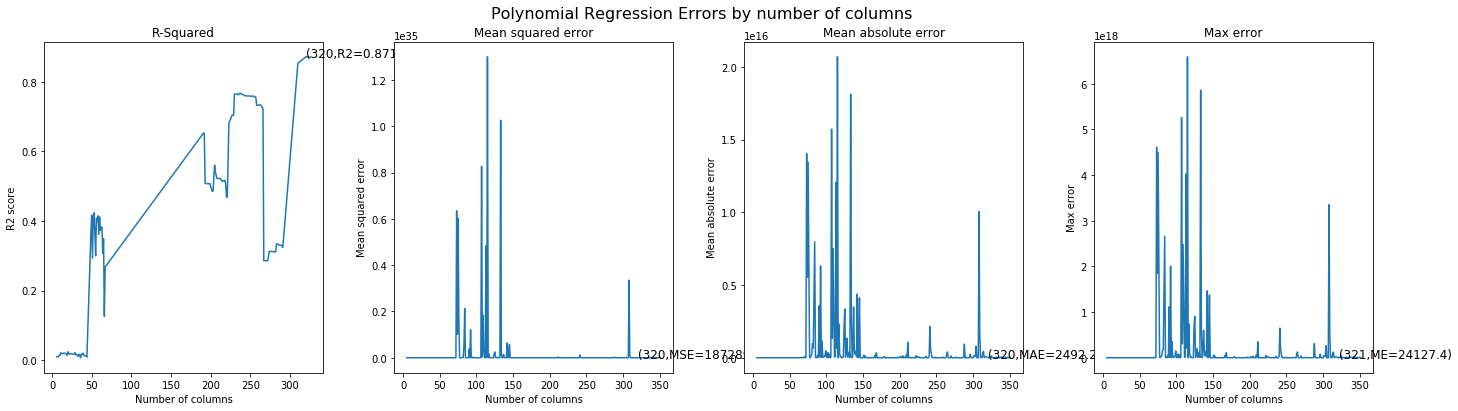

In [52]:
plot_errors(metrics=Metrics,algorithm='Polynomial Regression',r2_positive_only=True)

The features Permutation Importance selected 320 predictors and reached the highest training score up until now: 0.87. The other metrics also confirm the optimal number of features is 320.<br>
Since we are using Linear Regression to estimate the weights of our polynomial, we will not need any parameter tuning. So we will jump into the test prediction.

#### Predict using the selected parameters and features

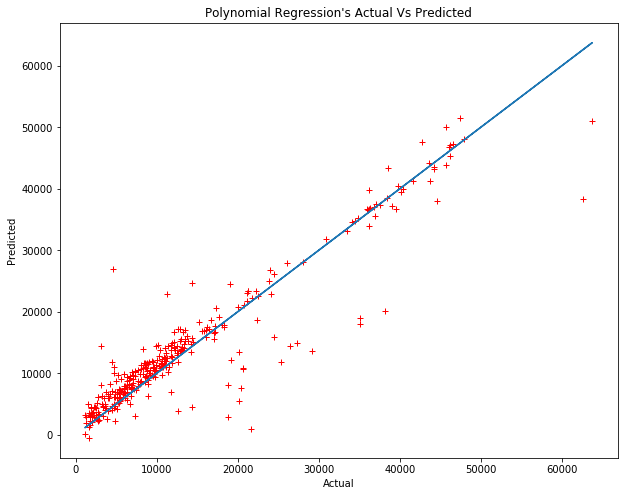

R-squared : 0.8715674061503637
Max Error : 24179.543238206832
Mean Absolute Error : 2492.158535638942
Mean Squared Error : 18728902.534714535


In [53]:
regressor = LinearRegression().fit(X_train_new, y_train)

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Polynomial Regression')

Up till now, the Polynomial Regression **Actual Versus Predicted** plot shows the highest accuracy. We can see the ***Predicted by Actual*** red marks getting closer to the ***Actual by Actual*** blue line. The $R^2$-Score is also the highest, meaning that the Polynomial Regression explains the variability of 87.16% of our test observations. The second degree Polynomial with 320 features is our new model candidate, and it will inspire our kernel choice in the Support Vector Machine Regressor.

### K-Nearest Neighbors Regression

K-Nearest Neighbors Regression is a regression algorithm that estimates the target variable of an observation $X_i$ based on its K closest neighbors. The predicted value is the average of the neighbors, and the surronding are decided based on the distance, although several distances can be used the Euclidean distance is the most common. To prevent the difference of scale between the features to impact the choice of neighbors we will use the standardized data.

##### Feature Selection

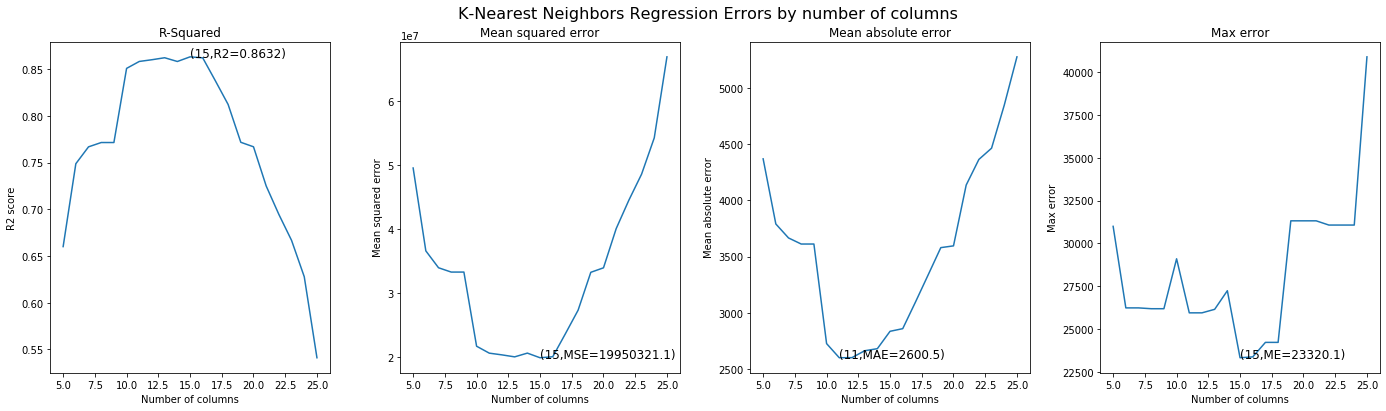

The Features Permutation Importance selected 15 columns that optimised the R2 score.
The selected columns are : Index(['East', 'children', 'North', 'Obese Class III', 'Overweight', 'bmi',
       'Severe Thinness', 'Moderate Thinness', 'Mild Thinness', 'Normal',
       '4 children', 'sex', '5 children', 'age', 'smoker'],
      dtype='object')


In [54]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'K-Nearest Neighbors Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='K-Nearest Neighbors Regression')
selected_Features = optimalColumns('K-Nearest Neighbors Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features] 
X_test_new = X_test_sc[:,selected_Features]

The $R^2$-Score and MSE graphs show an incremental improvement of their respective scores to reach the optimal point of 15 columns. The ME also attained its lowest error with 15 predictors. The MAE accomplished the most favorable metric with only 11 columns.
We need to note that the KNN training $R2$-Score is the closest to the Polynomial score. 

##### Parameter Tuning 

- K (n_neighbors): The number of voting neighbors, a small K can increase the sensibility of the algorithm to outliers, and a large K can reduce the accuracy of the regression and makes it computationally expensive.
- Weights: This parameter allows us to choose whether all the neighbors will be weighted equally('uniform'), or weighted by the inverse of their distance to the observation('distance').
- P: Represents the power of the used distance, 1 for the Manhattan distance and 2 for the Euclidean distance.

In [55]:
regressor = KNeighborsRegressor()
parameters = {'n_neighbors':[3,4,5,6,7,8,9,10,15,20,25,30],
              'weights':('uniform', 'distance'),
              'p':[1,2]}
gs = GridSearchCV(regressor, parameters, scoring= 'r2')
gs.fit(X_train_new, y_train)
print('K-Nearest Neighbors Regression best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

K-Nearest Neighbors Regression best parameters : {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'} with a score of 0.7959739556653427


##### Predict using the selected parameters and features

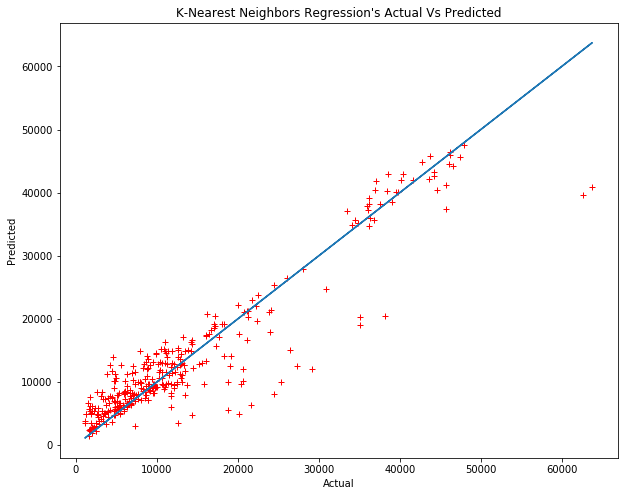

R-squared : 0.8647018456657815
Max Error : 22980.83256142858
Mean Absolute Error : 2807.7970627219615
Mean Squared Error : 19730084.628042564


In [56]:
regressor = gs.best_estimator_


plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'K-Nearest Neighbors Regression')

First, we should note that KNN scored the closest to the Polynomial Regression $R^2$-Score with a value of 0.86.<br>
We can see in the graph that the general aspect is similar to the polynomial plot, with a difference in the concentration of points near the Actual line: In the **Actual Versus Predicted** graph of Polynomial regression, the predicted points are more concentrated near the blue line. We can also see this graphical difference in the error metrics: Although the KNN Max Error is the lowest among the two, the Polynomial scored the lowest Mean absolute and squared errors. So the Variability of the Polynomial is lower than the KNN.<br>
If we focus only on the prediction accuracy, we find the Polynomial gives the best-fitted predictor. But weighing the accuracy gain against the computation cost, the KNN seems to be the most appropriate model.

### Support Vector Machine Regression

Support Vector Machine is a widely used algorithm for classification. It applies two principles : 
- Maximum Margin: For binary classification, for instance, the idea is to find the hyperplane that maximizes the distance(margin) between the two classes.
- Kernel Trick: When the data are not linearly separable, the use of non-linear kernel functions allows the SVM to find the hyperplane in a transformed feature space.
These same concepts are applicable in the regression application of the SVM, with the main difference between the two algorithms is:
-  The SVM classifier tries to find the hyperplane that maximizes the distance(margin) between the classes, 
-  The SVM regressor tries to minimize the error by fitting the residuals within a certain threshold, analog to classification margin.

Since we have reached the highest R^2-score using the Polynomial Regression of order 2, we will use the Polynomial Kernel of degree 2in our SVR. 

##### Feature Selection

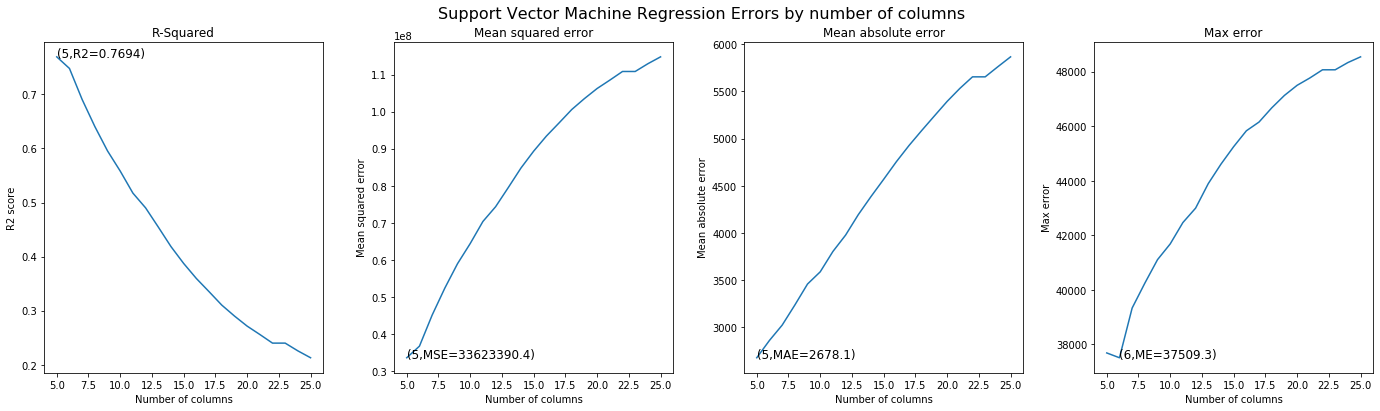

The Features Permutation Importance selected 5 columns that optimised the R2 score.
The selected columns are : Index(['3 children', 'bmi', 'Obese Class II', 'age', 'smoker'], dtype='object')


In [57]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'Support Vector Machine Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Support Vector Machine Regression')
selected_Features = optimalColumns('Support Vector Machine Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features] 
X_test_new = X_test_sc[:,selected_Features]

The Feature Permutation Importance selected only five columns, the lowest number of features until now. We find two among the five elected columns are weight-related.
All the graphs show a linear relationship between their respective metrics and the number of predictors. The quality of the scores is inversely related to the number of columns. 

##### Parameter Tuning:

As mentioned above, we have chosen to use the second-degree polynomial kernel, so our parameters: kernel and degree are already set. In this step, we will try to optimize the other parameters C, epsilon, and coef0.
- C: It is the l2-penalty parameter. The higher the C, the lower the regularization is.
- epsilon: The threshold of errors, the points predicted at a distance $\epsilon$ from the actual ones are not penalized. 
- coef0: It is the independent term in our polynomial kernel function.

In [58]:
regressor = SVR(kernel='poly',degree=2,)
parameters = {'C':[100,500,1000,2000,3000],
              'epsilon':[.1,.01,.001,.0001,.00001],
              'coef0':[.1,.2]
              }
gs = GridSearchCV(regressor, parameters, scoring= 'r2')
gs.fit(X_train_new, y_train)
print('Support Vector Machine Regression best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

Support Vector Machine Regression best parameters : {'C': 2000, 'coef0': 0.2, 'epsilon': 0.1} with a score of 0.8029596932351442


The GridSearch returned a very high penalty parameter C. 
The C parameter is inversely proportional to the penalty strength,  so the regularization will not be as strong as the one applied while selecting the predictors. The results on the test set will tell us if the SVR with five columns and C=2000 is capable of predicting new observations. 
##### Predict using the selected parameters and features

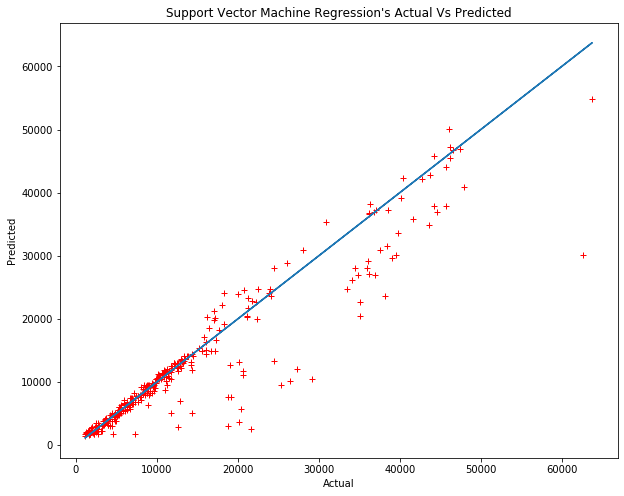

R-squared : 0.8699060328526892
Max Error : 32494.097729297064
Mean Absolute Error : 2001.3771809041677
Mean Squared Error : 18971175.13572072


In [59]:
regressor = gs.best_estimator_

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Support Vector Machine Regression')

The **Actual Versus Predicted** graph shows a majority of points positioned on the line translating the exactitude of the predictions. And 
a minority of mispredictions that tend to be lower than the actual observation. 
The $R^2$-Score did improve compared to the training results, which means that our model is not overfitting and is capable of estimating the charges of new observations. 
We note that this metric is very close to the Polynomial regression one; SVR with a second-degree polynomial kernel scored 0.869, and the second-degree polynomial regression scored 0.871. Very tight results with a lower computational cost.


### Decision Tree Regression

The decision tree is an easy to interpret model since it mimics human decision-making behavior. It uses a tree-like model where the branches represent conjunctions between the features and the leaves of the target variable. The CART (Classification and Regression Tree) doesn't require much data preparation since it can handle categorical and doesn't need standardization. 

##### Feature Selection

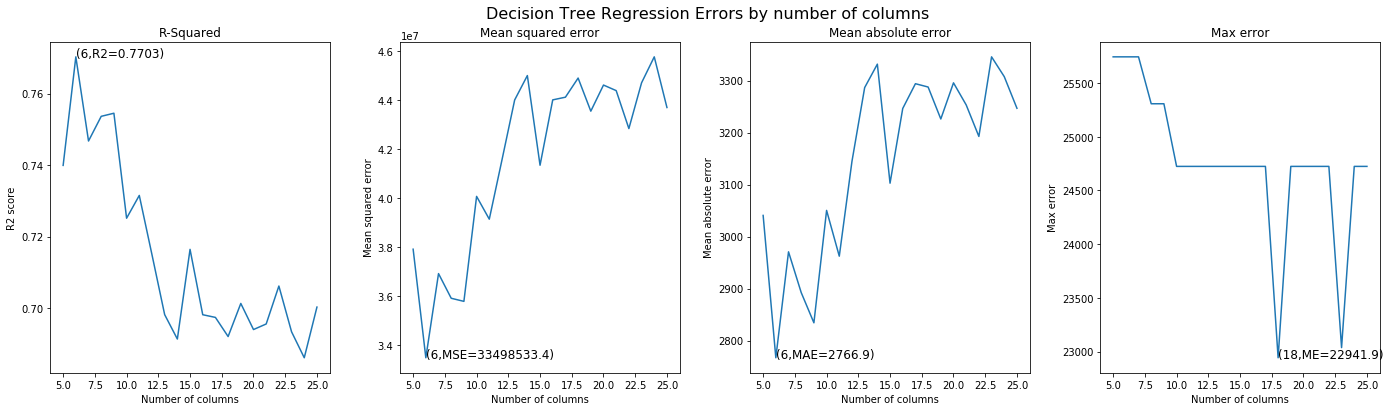

The Features Permutation Importance selected 6 columns that optimised the R2 score.
The selected columns are : ['North', 'northeast', '0 children', 'bmi', 'age', 'smoker']


In [60]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train,
                                                                y = y_train,
                                                                X_test = X_test,
                                                                y_test = y_test,
                                                                algorithm = 'Decision Tree Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Decision Tree Regression')
selected_Features = optimalColumns('Decision Tree Regression',Metrics,X_train.columns)
X_train_new = X_train[selected_Features] 
X_test_new = X_test[selected_Features]

The Feature Permutation Importance selected six columns, two of which are weight-related.

##### Predict using the selected parameters and features

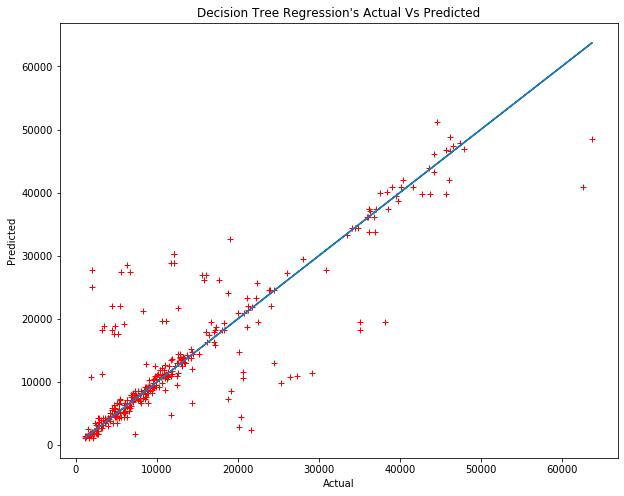

R-squared : 0.7558507773729317
Max Error : 25744.21875
Mean Absolute Error : 2895.9923392507458
Mean Squared Error : 35603477.72670659


In [61]:
regressor = DecisionTreeRegressor().fit(X_train_new,y_train)

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Decision Tree Regression')

 We can see from the graph that the exactitude of the predictions near the blue line is better than the Linear regression; more marks are on the Actual line. But we can see that the disparity of the mispredicted observation led to lower the $R^2$-Score and skyrocket the Mean Squared Error compared to SVR, so we can't consider the Decision Tree as a reliable regressor for our target variable.


### Random Forest Regression

Random Forest Regression is part of the ensemble models family. An ensemble model is a model that combines several models to improve the accuracy of their predictions.

Random Forest constructs its decision by building several trees. Each tree of the ensemble predicts the target variable, and the final result is the average.


##### Feature Selection

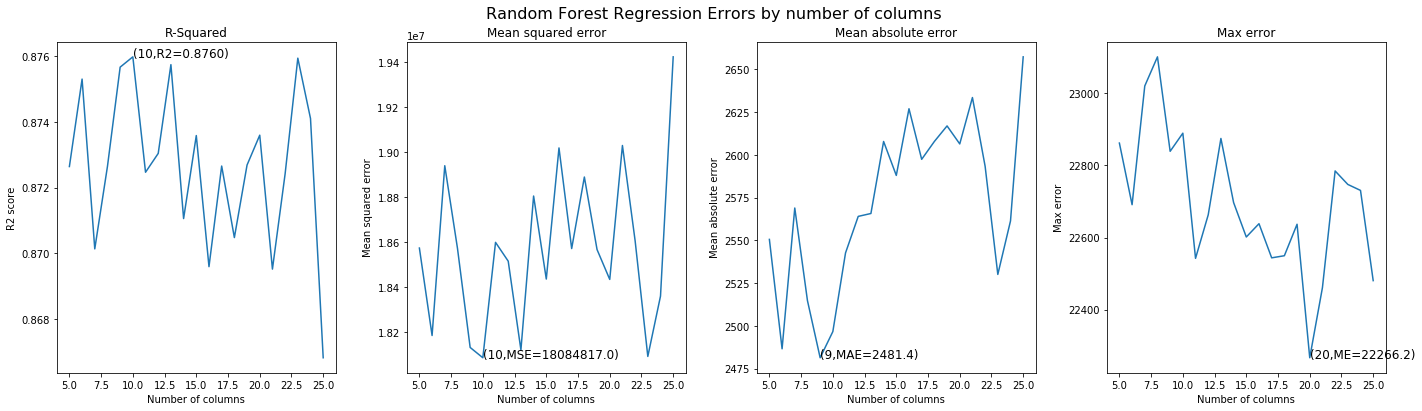

The Features Permutation Importance selected 10 columns that optimised the R2 score.
The selected columns are : ['sex', '1 child', 'Overweight', 'North', '0 children', 'northeast', 'children', 'age', 'bmi', 'smoker']


In [62]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train,
                                                                y = y_train,
                                                                X_test = X_test,
                                                                y_test = y_test,
                                                                algorithm = 'Random Forest Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Random Forest Regression')
selected_Features = optimalColumns('Random Forest Regression',Metrics,X_train.columns)
X_train_new = X_train[selected_Features] 
X_test_new = X_test[selected_Features]

##### Parameter Tuning:

In this section, we will try to optimize the number of estimators used in the random forest.

In [63]:
regressor = RandomForestRegressor()
parameters = {'n_estimators':[100,500,1000,2000,3000]}
gs = GridSearchCV(regressor, parameters, scoring= 'r2')
gs.fit(X_train_new, y_train)
print('Random Forest Regression best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

Random Forest Regression best parameters : {'n_estimators': 500} with a score of 0.8223990242181445


##### Predict using the selected parameters and features

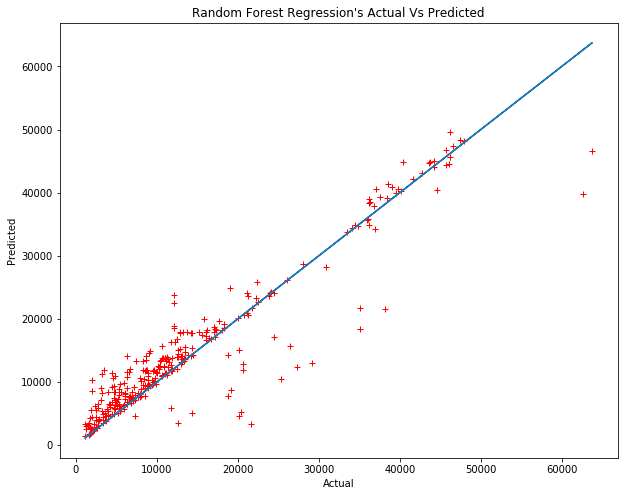

R-squared : 0.8769664087784532
Max Error : 22735.315741080005
Mean Absolute Error : 2508.052345061139
Mean Squared Error : 17941583.747674067


In [64]:
regressor = gs.best_estimator_


plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Random Forest Regression')

The Random Forest with 1000 estimator reached our best $R^2$-Score. The **Actual Versus Predicted** graph shows that the number of red marks on the line is not as high as other regressors. But the number of mispredictions that are very distant from the Actual Line is not as high. This observation can be seen in the Mean Squared Error as it's the lowest we have obtained until now.

### Gradient Boosting Regression

A boosting ensemble model is an ensemble model that improves the accuracy of the combined estimators incrementally. The Gradient Boosting Regressor ameliorates the prediction in stages. Each stage represents an estimator that tries to minimize the residual of its predecessor. 

##### Features selection

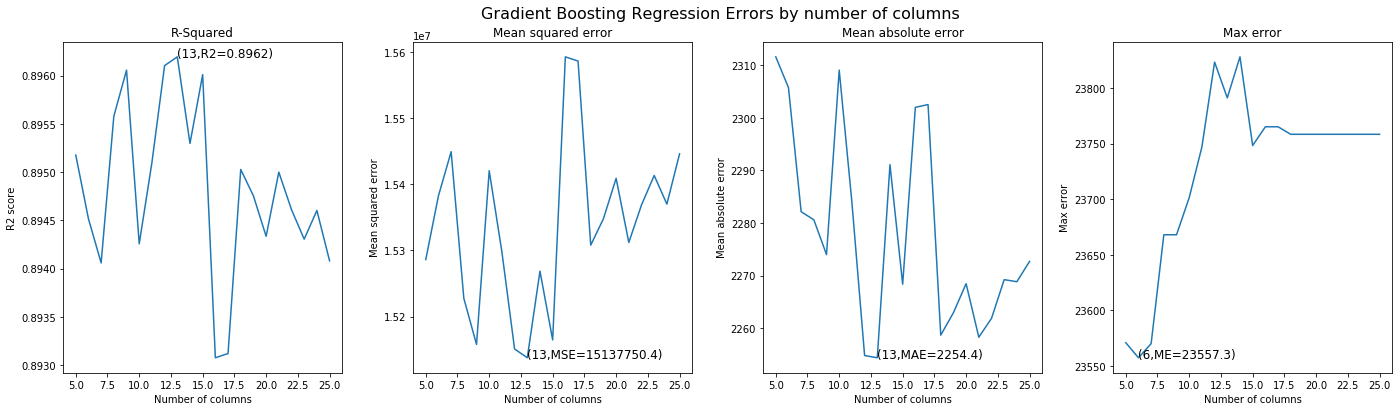

The Features Permutation Importance selected 13 columns that optimised the R2 score.
The selected columns are : Index(['1 child', 'northwest', 'southeast', '2 children', '0 children',
       'northeast', 'sex', 'North', '4 children', 'children', 'age', 'bmi',
       'smoker'],
      dtype='object')


In [65]:
Metrics = Metrics.append(permutation_importance_percolnumber(X = X_train_sc,
                                                                y = y_train,
                                                                X_test = X_test_sc,
                                                                y_test = y_test,
                                                                algorithm = 'Gradient Boosting Regression'),
                         ignore_index=True)
plot_errors(metrics=Metrics,algorithm='Gradient Boosting Regression')
selected_Features = optimalColumns('Gradient Boosting Regression',Metrics,X_train.columns)
X_train_new = X_train_sc[:,selected_Features] 
X_test_new = X_test_sc[:,selected_Features]

##### Parameter Tuning:

The Gradient Boosting algorithm has two parameters that require tuning to find the optimal middle ground:
- The n_estimators parameter characterizes the number of boosting stages, 
- The learning_rate represents the contribution of each estimator on the final results.

Choosing small learning rates improves the generalization of our model, making it robust against overfitting but require a large number of estimators, which can be computationally costly. 

In [66]:
regressor = GradientBoostingRegressor()
parameters = {'learning_rate':[0.0001,0.001,0.01,0.1],
              'n_estimators':[100,200,500,1000,2000]}
gs = GridSearchCV(regressor, parameters, scoring= 'r2')
gs.fit(X_train_new, y_train)
print('Gradient Boosting Regression best parameters : {} with a score of {}'.format(gs.best_params_,gs.best_score_))

Gradient Boosting Regression best parameters : {'learning_rate': 0.01, 'n_estimators': 500} with a score of 0.8449469009224959


##### Predict using the selected parameters and features

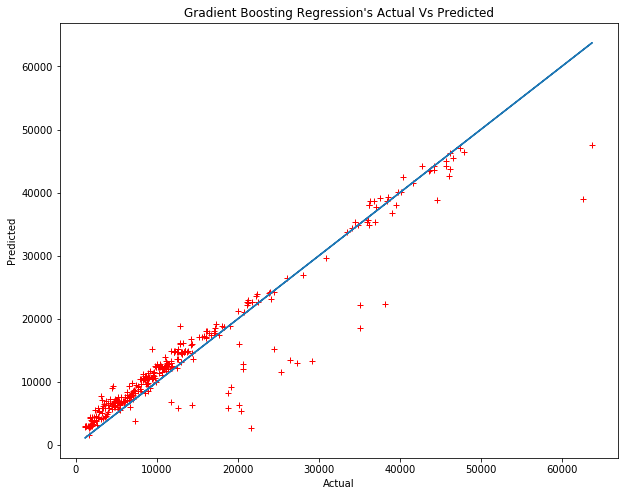

R-squared : 0.9001956352820177
Max Error : 23587.176570092022
Mean Absolute Error : 2264.6207864311864
Mean Squared Error : 14554142.085852493


In [67]:
regressor = gs.best_estimator_

plot_ActualVsPredicted(regressor,
                       X_test_new,
                       y_test,
                       'Gradient Boosting Regression')

The **Actual Versus Predicted** graph shows that the number of observations predicted correctly is not as high as expected, but the dispersity is very low. The $R^2$-Score is the highest 0.9. This result outperforms all the other regressors, so our winner model is the Gradient Boosting Regression.

## Results

 We based the evaluation of our models on the $R^2$-Score or coefficient of determination. It allowed us to determine the goodness of fit of our data to the model. We will list below the $R^2$-Score for each model:

| Algorithm | $R^2$-Score |
| :--- | --- |
| Linear Regression | 0.774 |
| Ridge Regression | 0.772 |
| Lasso Regression | 0.770 |
| ElasticNet Regression | 0.772 |
| Polynomial Regression ($2^{nd}$ degree Polynomial)| 0.872 |
| K-Nearest Neighbors | 0.865 |
| Support Vector Machine Regression ($2^{nd}$ degree Polynomial Kernal) | 0.870 |
| Decision Tree Regression | 0.756 |
| Random Forest Regression | 0.880 |
| Gradient Boosting Regression | 0.900 |

The results stated in the table above show, for this problem, the accuracy superiority of two groups of models:
- The Second-degree Polynomial Regression, and the Support Vector Machine Regression with Second-degree Polynomial Kernel, These results may imply that the relation between our target variable and our predictors is Polynomial.
- The ensemble methods: Random Forest Regression and Gradient Boosting Regression, the ensemble methods benefit from the brute force of the estimators' number and generally outperform other estimators. 

## Conclusion

In this study, we were able to reach a coefficient of determination equal to 0.9 by using the ensemble model **Gradient Boosting Regression**. The use of such a computationally expensive model can be criticized, considering the accuracy gain compared to the **SVR**.<br>
If we subtract the computation cost, then an eventual combination can be considered: We can use the polynomial features with the ensemble methods. This way, we can benefit from the two best-performing groups. 

This NoteBook allowed me to dive deeper into regression algorithms and better understand the parameters and how they affect the fitting of predictions. I was able to practice EDA technics and get more at ease with hypothesis testing.

## Reference

[0]<a name='ref0' href='https://www.kaggle.com/mirichoi0218/insurance'> https://www.kaggle.com/mirichoi0218/insurance</a> <br>
[1]<a name='ref1' href='https://machinelearningmastery.com/chi-squared-test-for-machine-learning/'> https://machinelearningmastery.com/chi-squared-test-for-machine-learning/</a> <br>
[2]<a name ='ref2' href='https://scikit-learn.org/stable/supervised_learning.html#supervised-learning'>https://scikit-learn.org/stable/supervised_learning.html#supervised-learning</a><br>